# **Introduction**

> **Partie I - Modélisation Univariée**


1.   Impotation des données : taux d'infaltion et taux de chômage aux Etats-Unis du 1950 au 2023

2.   Représentations graphiques et autocorrélogrammes simples et partiels des 2 séries temporelles

3.   Test de racine unitaire (test ADF et KPSS)

4.   Modèle ARMA

5.   Les prévisions

> **Partie II - Modélisation Multivariée**

6.   Modèle VAR

7.   Test de causalité

8.   Analyse impulsion - réponse des chocs (Méthode VAR et Méthode des projections locales)

9.   Test de cointégration de Johansen


---
Ce projet d'économétrie vise à explorer la relation historique entre le taux de chômage et le taux d'inflation aux États-Unis, une dynamique souvent encapsulée dans la fameuse courbe de Phillips. Depuis sa conceptualisation par A.W. Phillips, la courbe a été un sujet de débat continu, illustrant une relation inverse à court terme entre le chômage et l'inflation. Ce phénomène est fondamental pour comprendre comment les pressions inflationnistes sont liées à la capacité d'une économie à créer des emplois.
Notre analyse se concentrera sur les données temporelles de 1950 à 2023, une période qui comprend de multiples cycles économiques, politiques monétaires et fiscales variées, ainsi que des événements exceptionnels susceptibles d'affecter la relation entre ces deux variables. Nous débuterons par une analyse univariée de chaque série temporelle, en employant des représentations graphiques et des autocorrélogrammes pour examiner leurs caractéristiques statistiques et leur stationnarité.
Après avoir établi la stationnarité des séries, nous développerons un modèle ARMA pour l'une des séries et fournirons des prévisions. Cette étape préparera le terrain pour une modélisation multivariée plus complexe, où nous estimons un modèle VAR pour capturer la dynamique conjointe de l'inflation et du chômage.
Par la suite, nous allons étudier si la relation entre le chômage et l'inflation a changé de manière complexe et imprévue au fil du temps. Pour cela, nous utiliserons des méthodes statistiques pour voir si l'une de ces mesures économiques prédit l'autre et dans quelle mesure elles s'affectent mutuellement.

Cette exploration complète offre une opportunité de comprendre profondément la relation entre les deux variables les plus surveillées en macroéconomie, en fournissant des prévisions pertinentes et en informant les décisions politiques.



`*Projet réalisé par KHOBZI Ismail et YANG Zehui*`

In [ ]:
# choix des packages qu'on va utiliser pour ne pas perdre du temps

install.packages('ggplot2')
install.packages('urca')
install.packages('forecast')
install.packages("FinTS")
install.packages("moments")
install.packages("vars")
install.packages('lpirfs')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘strucchange’, ‘sandwich’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘miscTools’, ‘rbibutils’, ‘iterators’, ‘bdsmatrix’, ‘collapse’, ‘maxLik’, ‘Rdpack’, ‘Formula’, ‘doParallel’, ‘foreach’, ‘gridExtra’, ‘plm’




# **Partie I - Modélisation Univariée**



## **Question 1 - Importation et Visualisation des Données**

On importe les données annuelles du **taux d'inflation** et du **taux de chômage** des Etats-Unis **de 1950 à 2023** (73 observations).

In [ ]:
# Importation des données

rm(list = ls())
options(digits = 3)

library(readxl)

df <- read_excel('Series_temporelles.xlsx')
str(df)

tibble [74 × 3] (S3: tbl_df/tbl/data.frame)
 $ Annees   : num [1:74] 1950 1951 1952 1953 1954 ...
 $ Chomage  : num [1:74] 5.21 3.28 3.03 2.93 5.59 ...
 $ Inflation: num [1:74] 1.3 7.9 1.9 0.8 0.7 -0.4 1.5 3.3 2.8 0.7 ...


On crée un dataframe contenant uniquement les dates (colonne "Années") et la série du taux d'inflation (colonne "Inflation").

In [ ]:
# Création dataframe pour le taux d'inflation

inflation <- df[,c("Annees","Inflation")]
colnames(inflation) <- c('Années','Inflation')

head(inflation)
tail(inflation)
anyNA(inflation)

Années,Inflation
<dbl>,<dbl>
1950,1.3
1951,7.9
1952,1.9
1953,0.8
1954,0.7
1955,-0.4


Années,Inflation
<dbl>,<dbl>
2018,2.40
2019,1.80
2020,1.20
2021,4.70
2022,8.00
2023,4.43


[1] FALSE

On crée un dataframe contenant uniquement les dates (colonne "Années") et la série du taux de chômage (colonne "Chômage").

In [ ]:
# Création dataframe pour le taux de chômage

chomage <- df[,c("Annees","Chomage")]
colnames(chomage) <- c('Années','Chômage')

head(chomage)
tail(chomage)
anyNA(chomage)

Années,Chômage
<dbl>,<dbl>
1950,5.21
1951,3.28
1952,3.03
1953,2.93
1954,5.59
1955,4.37


Années,Chômage
<dbl>,<dbl>
2018,3.89
2019,3.68
2020,8.09
2021,5.37
2022,3.64
2023,3.59


[1] FALSE

Nos 2 séries ne présentent aucune valeur manquante. Aisni, on va les représenter graphiquement.

## **Question 2 - Représentations Graphiques et Autocorrélogrammes Simples et Partiels**


### **Représentation Graphiques**


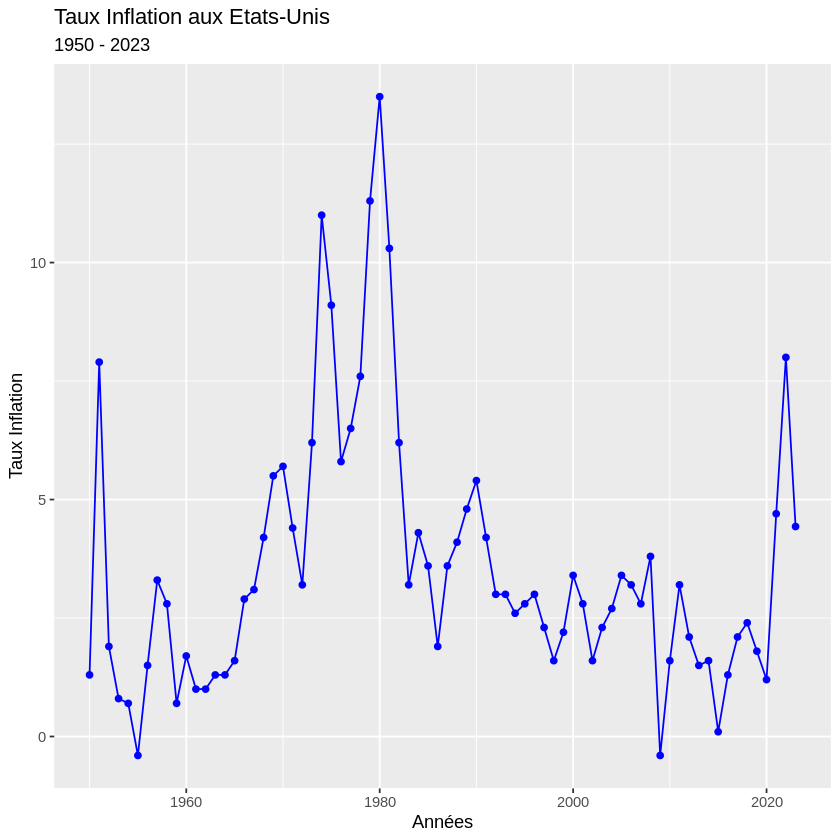

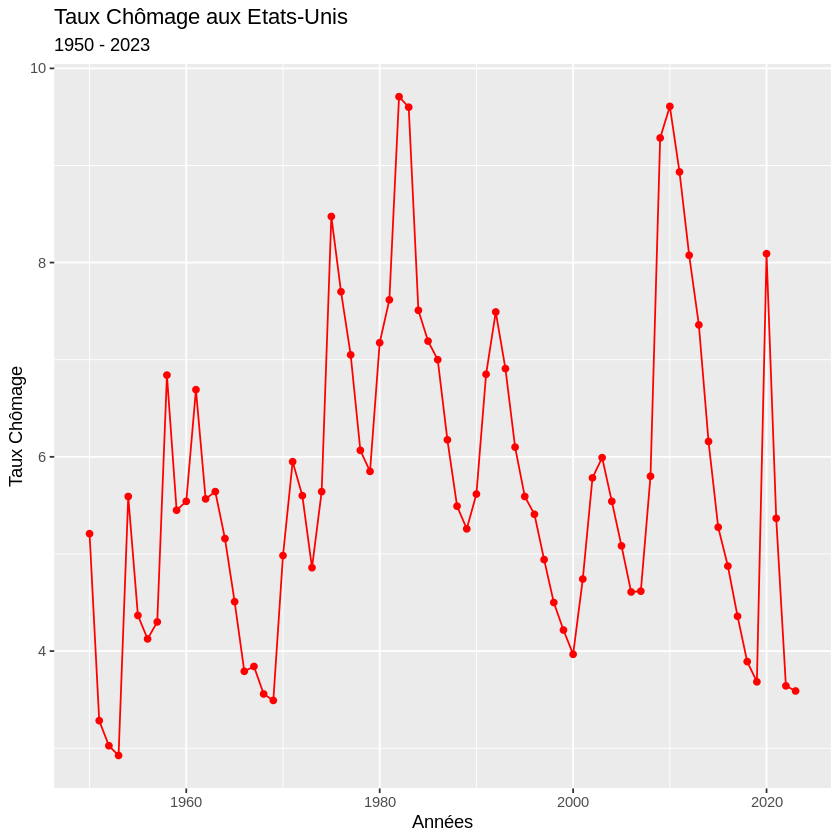

In [ ]:
# Importation de la librairie 'ggplot2'

#install.packages('ggplot2')
library(ggplot2)


# Représemtation graphique du taux d'inflation

plot_inflation_us <- ggplot(data = inflation, aes(x = Années, y = Inflation)) +
  geom_point(color = 'blue') + geom_line(color = 'blue') + xlab('Années') + ylab('Taux Inflation')
plot_inflation_us +
  labs(y = "Taux Inflation", title = "Taux Inflation aux Etats-Unis", subtitle = "1950 - 2023")


# Représemtation graphique du taux de chômage

plot_chomage_us <- ggplot(data = chomage, aes(x = Années, y = Chômage)) +
  geom_point(color = 'red') + geom_line(color = 'red') + xlab('Années') + ylab('Taux Chômage')
plot_chomage_us +
    labs(y = "Taux Chômage", title = "Taux Chômage aux Etats-Unis", subtitle = "1950 - 2023")


- **Graphique de l'évolution du taux d'inflation (bleu) aux Etats-Unis de 1950 à 2023:**

On remarque que le taux d'inflation a connu d'importantes fluctuations au cours de la période observée. Cela indique des périodes de volatilité économique, ainsi que des périodes de relative stabilité.

Plusieurs pics significatifs d'inflation, en particulier en 1974 (11%) et en 1980 (13,5%). Ces pics pourraient correspondre à des chocs pétroliers suite aux guerres au Moyen-Orient, à des politiques monétaires expansionnistes, ou à d'autres facteurs macroéconomiques perturbateurs.

A la suite des pics des années 1980, le taux d'inflation semble avoir diminué et s'est stabilisé à un niveau plus bas (1,60%) jusqu'au début des années 2000, ce qui peut refléter les efforts de la Réserve Fédérale pour maîtriser l'inflation.
En 2022, le graphique montre un pic d'inflation notable (8%). Ce pic récent pourrait correspondre à des perturbations économiques causées par la pandémie de COVID-19.

- **Graphique de l'évolution du taux de chômage (rouge) aux Etats-Unis de 1950 à 2023:**

Le taux de chômage fluctue de manière significative sur l'ensemble de la période, indiquant des périodes de récession et d'expansion économique.

Des pics significatifs sont visibles à plusieurs reprises, ce qui pourrait correspondre à des périodes de crises économiques ou de ralentissement, comme celles en 1975 (8,48%), en  1982 (9,71%), à la suite de la période de la crise financière de 2007-2008 (9,61% en 2010), et de la crise du COVID-19 (8% en 2020).

Bien que le taux de chômage ait connu des pics, on peut observer des périodes où il diminue (en 2000 par exemple), ce qui pourrait être le résultat de la reprise économique, des politiques d'emploi, ou d'autres facteurs favorisant la création d'emplois.

- **Comparaison des deux graphiques:**

En examinant la courbe de Phillips, qui présente une relation négative entre l'inflation et le chômage à court terme, les données de nos deux graphiques peuvent ne pas toujours montrer une corrélation claire et inverse. Cela pourrait être influencé par d'autres facteurs et politiques économiques.

On note que pendant le début des années 1970, les États-Unis ont connu de la stagflation, où le chômage élevé et l'inflation étaient présents simultanément, ce qui défie l'interprétation traditionnelle de la courbe de Phillips.


- **Interprétation de la stationnarité du taux d'inflation et du taux d'inflation:**

Visuellement, en se basant sur les graphiques aucune des deux séries ne semblent être stationnaire. Les deux montrent des changements significatifs dans leurs niveaux moyens et leurs variances au fil du temps, ainsi que des périodes de pics et de creux.


### **Autocorrélogrammes Simples et Partiels**

#### **ACF et PACF du taux d'inflation**

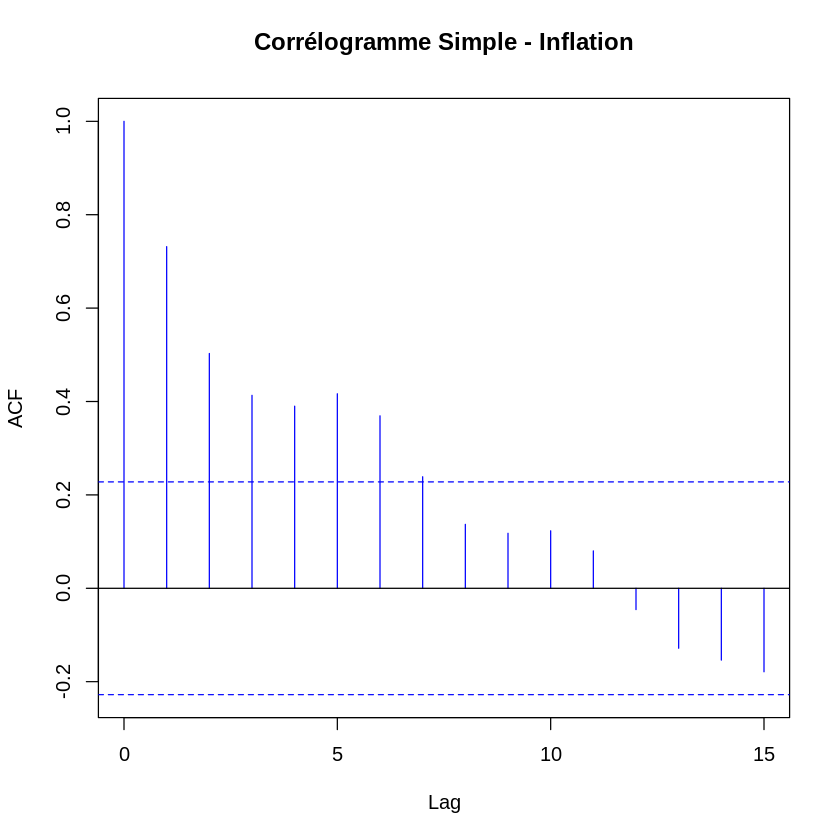

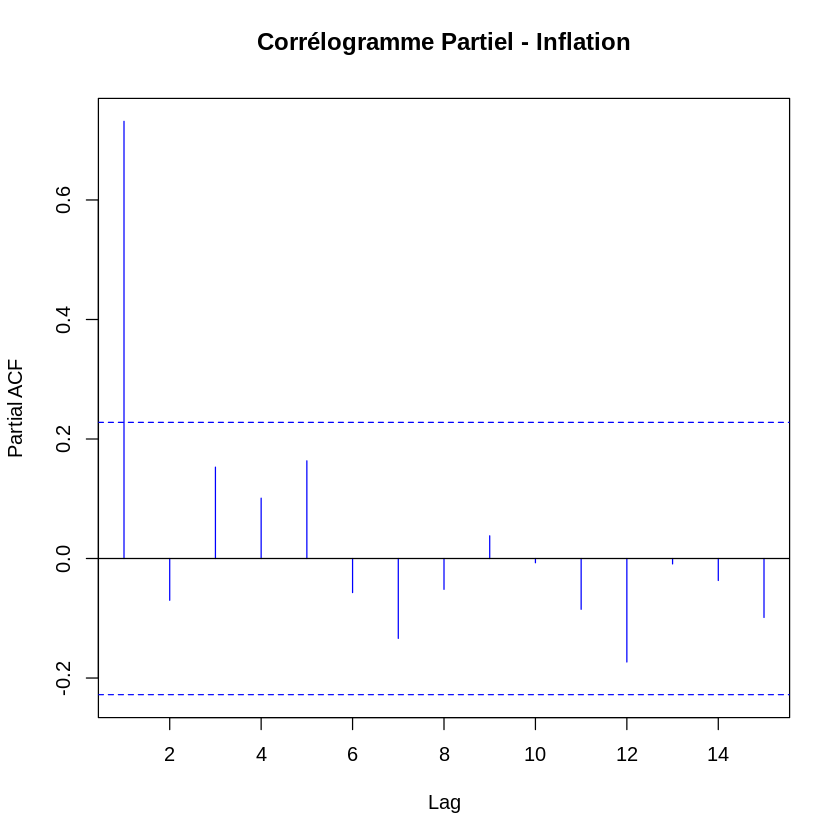

In [ ]:
acf(x = inflation$Inflation, lag.max = 15, main = 'Corrélogramme Simple - Inflation', col = 'blue')

pacf(x = inflation$Inflation, lag.max = 15, main = 'Corrélogramme Partiel - Inflation', col = 'blue')

On observe que le PACF du taux d'inflation n'a que son premier terme différent de 0. La décroissance rapide des barres après le premier ou les deux premiers lags suggère que les valeurs de la série sont principalement influencées par les valeurs immédiatement précédentes et que les influences des lags plus éloignés sont minimales, cela caractérise un $AR(1)$.

L'ACF du taux d'inflation présente une  corrélation initiale forte et positive, ce qui est typique pour une série temporelle non-stationnaire. La décroissance lente des barres d'autocorrélation suggère qu'un choc à un certain point a un effet qui diminue lentement au fil du temps. Cela indique également une dépendance à long terme et est un signe que la série peut être non-stationnaire.



#### **ACF et PACF du taux de chômage**

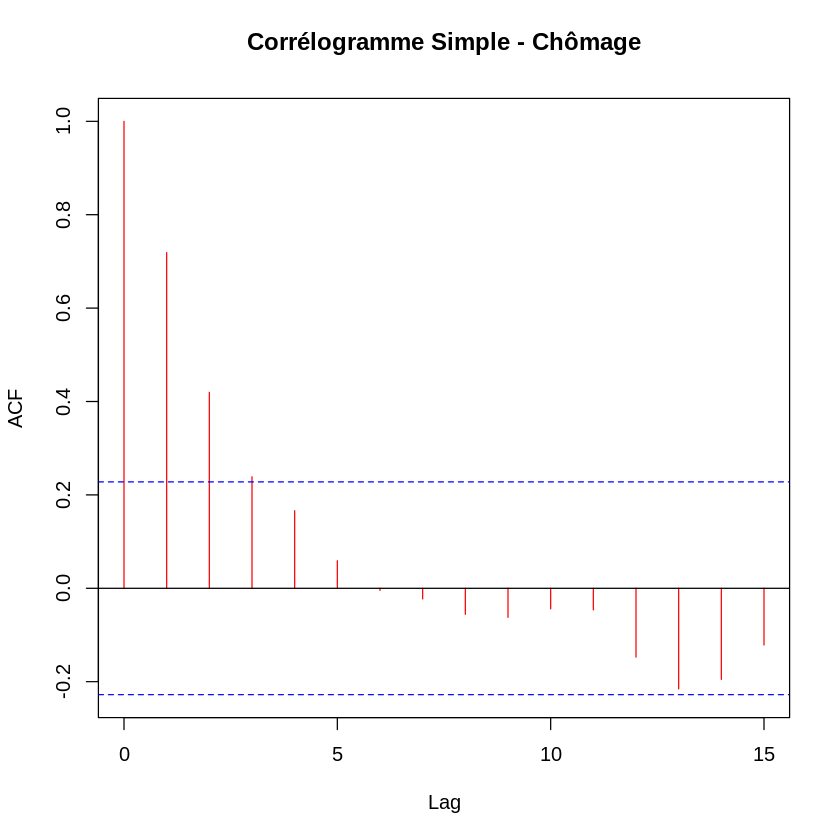

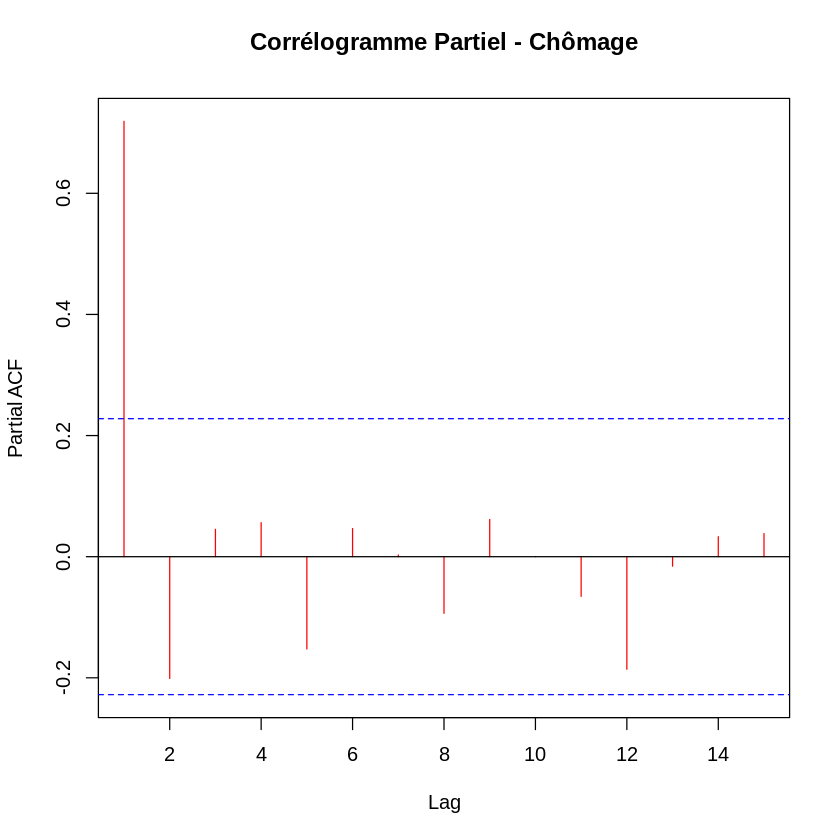

In [ ]:
acf(x = chomage$`Chômage`, lag.max = 15, main = 'Corrélogramme Simple - Chômage', col = 'red')

pacf(x = chomage$`Chômage`, lag.max = 15, main = 'Corrélogramme Partiel - Chômage', col = 'red')


Les autocorrélations sont positives et significativement jusqu'au retard 3.
Le premier retard est proche de 1 puis les autres sont décroissent rapidement vers 0. Ce qui indique que les observations ne sont pas fortement corrélées avec leurs valeurs passées. Cela peut suggérer que la série est stationnaire.  
Les autocorrélations partielles sont significatives pour le retard 1.
Le profil des autocorrélations suggère d'esimer un modèle $AR(1)$.

- Conclusion:

Le taux de l'inflation et le taux du chômage sont tous caractérisés comme $AR(1)$, donc ils ne sont pas forcément stationnaires. Nous allons, dans la prochaine partie, tester leurs stationnarités en utilisant le test de racine unitaire (ADF) et le test de KPSS.


## **Question 3 - Test de Racine Unitaire et KPSS**

Etant donné que nous ne savons pas si les résidus du modéle sont des bruits blancs, et afin d'éviter que les résultats du test soit faussés. On réalise le test ADF pour blanchir les résidus.

### **Inflation**

#### **Inflation - TRU**


On utilise la librairie urca pour faire les tests de racine unitaire.

In [ ]:
# Inslatallation de la librairie 'urca'

#install.packages('urca')
require('urca')
library(urca)

Loading required package: urca



**Stratégie séquentielle de TRU**

---
##### **Etape 1 : avec constante et tendance déterministe**

Nous allons d'abord tester le **modèle 3** :
$$ΔX_t=𝜌X_{t-1}+c+bt+∑^{p}_{j=1}δ_jΔX_{t-j}+𝜀_t$$

avec les hypothèses suivantes:

$$\begin{equation}
\begin{cases}
H_0:𝜌=0\ (non\ stationnaire)\\
H_1:𝜌<0\ (stationnaire)
\end{cases}
\end{equation}$$

In [ ]:
# Modèle 3 - Test ADF avec constante et tendance déterministe

adf_inflation_M3 <- ur.df(inflation$Inflation, type = 'trend' , lag = 15 , selectlags = 'AIC')
summary(adf_inflation_M3)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
   Min     1Q Median     3Q    Max 
-4.334 -0.845 -0.234  0.472  4.150 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   2.5622     0.9608    2.67   0.0101 * 
z.lag.1      -0.3062     0.1029   -2.97   0.0044 **
tt           -0.0296     0.0148   -2.01   0.0499 * 
z.diff.lag1   0.3572     0.1269    2.81   0.0068 **
z.diff.lag2  -0.3130     0.1360   -2.30   0.0253 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.57 on 53 degrees of freedom
Multiple R-squared:  0.331,	Adjusted R-squared:  0.28 
F-statistic: 6.55 on 4 and 53 DF,  p-value: 0.000233


Value of test-statistic is: -2.97 3.04 4.53 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -4.04 -3.45

La statistique du test ADF (modèle 3) est :
$$t_{\hat{𝜌}}=-2,97$$

Les seuils de rejet figurent sur la ligne $tau3$. La statistique de test $t_{\hat{𝜌}}=-2,97$ est supérieure aux seuils de rejets pour les risques de première espèce de 1%, 5% et 10%. On ne peut pas rejeter $H_0$ du test de racine unitaire, on en déduit que le modèle 3 n'est pas stationnaire.

On va ensuite tester la tendance déterministe du modèle 3 avec les hypothèses suivantes :

$$\begin{equation}
\begin{cases}
H_0:b=0\\
H_1:b≠0\
\end{cases}
\end{equation}$$

Le t-stat de la tendance déterministe $t_{\hat{b}}=-2,01$. Le seuil de rejet qui figure sur la table de distribution de la tendance est égal à 3,14 pour un risque de première espèce de 5% et 75 observations. On a donc
$|t_{\hat{b}}|= 2,01 < 3,14$ : on ne peut pas rejeter $H_0$, c'est-à-dire que la tendance déterministe dans le modèle 3 n'est pas significative.

---



##### **Etape 2 : avec constante**

Vu que la tendance déterministe n'est pas significative dans le modèle 3, on va maintenant procéder au test sur le **modèle 2** :

$$ΔX_t=𝜌X_{t-1}+c+∑^{p}_{j=1}δ_jΔX_{t-j}+𝜀_t$$

avec les hypothèses suivantes:

$$\begin{equation}
\begin{cases}
H_0:𝜌=0\ (non\ stationnaire)\\
H_1:𝜌<0\ (stationnaire)
\end{cases}
\end{equation}$$

In [ ]:
# Modèle 2 - Test ADF avec constante

adf_inflation_M2 <- ur.df(inflation$Inflation, type = "drift", lag = 15, selectlags = 'AIC')
summary(adf_inflation_M2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
   Min     1Q Median     3Q    Max 
-4.721 -0.821 -0.290  0.710  4.291 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   0.8045     0.4054    1.98   0.0523 . 
z.lag.1      -0.1931     0.0885   -2.18   0.0335 * 
z.diff.lag1   0.3021     0.1273    2.37   0.0213 * 
z.diff.lag2  -0.3712     0.1365   -2.72   0.0088 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.62 on 54 degrees of freedom
Multiple R-squared:  0.28,	Adjusted R-squared:  0.24 
F-statistic:    7 on 3 and 54 DF,  p-value: 0.000463


Value of test-statistic is: -2.18 2.41 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.71  3.86


La statistique du test ADF (modèle 2) est :
$$t_{\hat{𝜌}}=-2,18$$

Les seuils de rejet figurent sur la ligne $tau2$. La statistique de test $t_{\hat{𝜌}}=-2,18$ est supérieure aux seuils de rejets pour les risques de première espèce de 1%, 5% et 10%. On ne peut pas rejeter $H_0$ du test de racine unitaire, on en déduit que le modèle 2 n'est pas stationnaire.

On va ensuite tester la constante du modèle 2 avec les hypothèses suivantes :

$$\begin{equation}
\begin{cases}
H_0:c=0\\
H_1:c≠0
\end{cases}
\end{equation}$$

Le t-stat de la constante $t_{\hat{c}}=1,98$. Le seuil de rejet qui figure sur la table de distribution de la constante est égal à 2,86 pour un risque de première espèce de 5% et 75 observations. On a donc
$|t_{\hat{c}}|= 1,98 < 2,86$ : on ne peut pas rejeter $H_0$, c'est-à-dire que la constante dans le modèle 2 n'est pas significative.

---


##### **Etape 3 : sans constante ni tendance déterministe**


Vu que la tendance déterministe et la constante ne sont pas significatives dans les précédents modèles, on va maintenant procéder au test sur le **modèle 1** :

$$ΔX_t=𝜌X_{t-1}+∑^{p}_{j=1}δ_jΔX_{t-j}+𝜀_t$$

avec les hypothèses suivantes:

$$\begin{equation}
\begin{cases}
H_0:𝜌=0\ (non\ stationnaire)\\
H_1:𝜌<0\ (stationnaire)
\end{cases}
\end{equation}$$

In [ ]:
# Modèle 1 - Test ADF sans constante ni tendance déterministe

adf_inflation_M1 <- ur.df(inflation$Inflation, type = "none", lag = 15, selectlags = 'AIC')
summary(adf_inflation_M1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
   Min     1Q Median     3Q    Max 
-4.466 -0.522 -0.082  1.005  4.079 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
z.lag.1      -0.0436     0.0477   -0.91   0.3648   
z.diff.lag1   0.2483     0.1277    1.94   0.0570 . 
z.diff.lag2  -0.4587     0.1326   -3.46   0.0011 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.66 on 55 degrees of freedom
Multiple R-squared:  0.228,	Adjusted R-squared:  0.186 
F-statistic: 5.41 on 3 and 55 DF,  p-value: 0.00246


Value of test-statistic is: -0.914 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61


La statistique du test ADF (modèle 1) est :
$$t_{\hat{𝜌}}=-0,91$$

Les seuils de rejet figurent sur la ligne $tau1$. La statistique de test $t_{\hat{𝜌}}=-0,91$ est supérieure aux seuils de rejets pour les risques de première espèce de 1%, 5% et 10%. On ne peut pas rejeter $H_0$ du test de racine unitaire, on en déduit que le modèle 1 n'est pas stationnaire, donc la série "taux d'inflation" n'est pas stationnaire.

**Conclusion sur les résultats de tests ADF** :

Les résultats des tests ADF nous amènent à conclure que la série temporelle du taux d'inflation des Etats-Unis est un processus DS d'ordre 1 (sans dérive) :

$$X_t∼I(1)$$


---

#### **Inflation - KPSS**

On applique le test de stationnarité de KPSS. On vérifie d'abord que la série n'est pas stationnaire autour d'une tendance, ensuite on fait de même autour d'une constante.

##### **Test autour d'une tendance déterministe**
On teste les hypothèses suivantes d'abord :

$$\begin{equation}
\begin{cases}
H_0:Série\ stationnaire\ autour\ d'une\ tendance\ déterministe\\
H_1:Série\ non\ stationnaire\ autour\ d'une\ tendance\ déterministe
\end{cases}
\end{equation}$$

In [ ]:
# Test KPSS autour d'une tendance déterministe

kpss_inflation_tau <- ur.kpss(inflation$Inflation, type = "tau", lags = "short")
summary(kpss_inflation_tau)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 3 lags. 

Value of test-statistic is: 0.225 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


La statistique du test $LM_{KPSS}=0,225$. Le seuil de rejet pour un risque de première espèce de 5% est $VC=0,146$. On a donc $LM_{KPSS}=0,225>0,146$ : on rejette $H_0$, le taux d'inflation n'est pas stationnaire autour d'une tendance déterministe.

On peut également rejeter $H_0$ pour les risques de première espèce de 1% et 10%.

---

##### **Test autour d'une constante**

Ensuite, on teste les hypothèses de la stationnarité autour d'une constante :

$$\begin{equation}
\begin{cases}
H_0:Série\ stationnaire\ autour\ d'une\ constante\\
H_1:Série\ non\ stationnaire\ autour\ d'une\ constante
\end{cases}
\end{equation}$$

In [ ]:
# Test KPSS autour d'une constante

kpss_inflation_mu <- ur.kpss(inflation$Inflation, type = "mu", lags = "short")
summary(kpss_inflation_mu)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.254 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


La statistique du test $LM_{KPSS}=0,254$. Le seuil de rejet pour un risque de première espèce de 5% est $VC=0,463$. On a donc $LM_{KPSS}=0,254<0,463$ : on accepte $H_0$, le taux d'inflation est stationnaire autour d'une constante.

On doit également accepter $H_0$ pour les risques de première espèce de 1% et 10%.

**Conclusion générale sur les tests de racine unitaire et KPSS :**

On obtient deux résultats différents à partir des deux tests KPSS et ADF.

Le test ADF conclut que la série temporelle du taux d'inflation est un processus DS d'ordre 1 (sans dérive), cependant le test KPSS nous dit que la série est stationnaire autour d'une constante. Cela pourrait suggérer que la non-stationnarité provient davantage des fluctuations autour de cette constante que d'une tendance persistante.

Afin de lever le doute, nous stationnariserons la série temporelle du taux d'inflation par la suite.

---

### **Chômage**

#### **Chômage - TRU**


On utilise la librairie urca pour faire les tests de racine unitaire.


**Stratégie séquentielle de TRU**

---
##### **Etape 1 : avec constante et tendance déterministe**

Nous allons d'abord tester le **modèle 3** :
$$ΔX_t=𝜌X_{t-1}+c+bt+∑^{p}_{j=1}δ_jΔX_{t-j}+𝜀_t$$

avec les hypothèses suivantes:

$$\begin{equation}
\begin{cases}
H_0:𝜌=0\ (non\ stationnaire)\\
H_1:𝜌<0\ (stationnaire)
\end{cases}
\end{equation}$$

In [ ]:
# Modèle 3 - Test ADF avec constante et tendance déterministe

adf_chomage_M3 <- ur.df(chomage$`Chômage`, type = 'trend' , lag = 15 , selectlags = 'AIC')
summary(adf_chomage_M3)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
   Min     1Q Median     3Q    Max 
-3.151 -0.599 -0.229  0.446  3.857 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2.14447    0.68798    3.12   0.0029 **
z.lag.1     -0.32421    0.09498   -3.41   0.0012 **
tt          -0.00486    0.00868   -0.56   0.5779   
z.diff.lag   0.28354    0.13229    2.14   0.0366 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.1 on 54 degrees of freedom
Multiple R-squared:  0.195,	Adjusted R-squared:  0.15 
F-statistic: 4.36 on 3 and 54 DF,  p-value: 0.00799


Value of test-statistic is: -3.41 4.06 6.08 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -4.04 -3.45 -3.15
phi2  6.50  4.88  4.16
phi3  8.73  6.49  5.47


La statistique du test ADF (modèle 3) est :
$$t_{\hat{𝜌}}=-3,41$$

Les seuils de rejet figurent sur la ligne $tau3$. La statistique de test $t_{\hat{𝜌}}=-3,41$ est supérieure aux seuils de rejets pour les risques de première espèce de 1% et 5%. On ne peut pas rejeter $H_0$ du test de racine unitaire aux seuils de 1% et 5%.

On va ensuite tester la tendance déterministe du modèle 3 avec les hypothèses suivantes :

$$\begin{equation}
\begin{cases}
H_0:b=0\\
H_1:b≠0\
\end{cases}
\end{equation}$$

Le t-stat de la tendance déterministe $t_{\hat{b}}=-0,56$. Le seuil de rejet qui figure sur la table de distribution de la tendance est égal à 3,14 pour un risque de première espèce de 5% et 75 observations. On a donc
$|t_{\hat{b}}|= 0,56 < 3,14$ : on ne peut pas rejeter $H_0$, c'est-à-dire que la tendance déterministe dans le modèle 3 n'est pas significative.

---

##### **Etape 2 : avec constante**

Vu que la tendance déterministe n'est pas significative dans le modèle 3, on va maintenant procéder au test sur le **modèle 2** :

$$ΔX_t=𝜌X_{t-1}+c+∑^{p}_{j=1}δ_jΔX_{t-j}+𝜀_t$$

avec les hypothèses suivantes:

$$\begin{equation}
\begin{cases}
H_0:𝜌=0\ (non\ stationnaire)\\
H_1:𝜌<0\ (stationnaire)
\end{cases}
\end{equation}$$

In [ ]:
# Modèle 2 - Test ADF avec constante

adf_chomage_M2 <- ur.df(chomage$`Chômage`, type="drift", lag = 15, selectlags = 'AIC')
summary(adf_chomage_M2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
   Min     1Q Median     3Q    Max 
-3.304 -0.627 -0.278  0.418  3.729 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   1.9429     0.5825    3.34   0.0015 **
z.lag.1      -0.3266     0.0943   -3.46   0.0010 **
z.diff.lag    0.2903     0.1309    2.22   0.0308 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.1 on 55 degrees of freedom
Multiple R-squared:  0.19,	Adjusted R-squared:  0.161 
F-statistic: 6.47 on 2 and 55 DF,  p-value: 0.00299


Value of test-statistic is: -3.46 6.01 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.71  3.86


La statistique du test ADF (modèle 2) est :
$$t_{\hat{𝜌}}=-3,46$$

Les seuils de rejet figurent sur la ligne $tau2$. La statistique de test $t_{\hat{𝜌}}=-3,46$ est supérieure au seuil de rejet pour le risque de première espèce de 1%. On ne peut pas rejeter $H_0$ du test de racine unitaire au seuil de 1%. Cependant on peut rejeter $H_0$ aux seuils de 5% et de 10%.

On va ensuite tester la constante du modèle 2 avec les hypothèses suivantes :

$$\begin{equation}
\begin{cases}
H_0:c=0\\
H_1:c≠0
\end{cases}
\end{equation}$$

Le t-stat de la constante $t_{\hat{c}}=3,34$. Le seuil de rejet qui figure sur la table de distribution de la constante est égal à 2,86 pour un risque de première espèce de 5% et 75 observations. On a donc
$|t_{\hat{c}}|= 3,34>2,86$ : on peut rejeter $H_0$, c'est-à-dire que la constante dans le modèle 2 est significative.



**Conclusion sur les résultats de tests ADF** :

Dans le modèle 2 aux seuils de 5% et de 10%, la série temporelle du taux de chômage est stationnaire avec dérive. Alors qu'au seuil de 1%, la série temporelle du taux de chômage est un processus DS d'ordre 1 avec dérive.

---
$$X_t∼I(0)+C$$




#### **Chômage - KPSS**


On applique le test de stationnarité de KPSS. On vérifie d'abord que la série n'est pas stationnaire autour d'une tendance, ensuite on fait de même autour d'une constante.

##### **Test autour d'une tendance déterministe**

On teste les hypothèses suivantes d'abord :

$$\begin{equation}
\begin{cases}
H_0:Série\ stationnaire\ autour\ d'une\ tendance\ déterministe\\
H_1:Série\ non\ stationnaire\ autour\ d'une\ tendance\ déterministe
\end{cases}
\end{equation}$$

In [ ]:
# Test KPSS autour d'une tendance déterministe

kpss_chomage_tau <- ur.kpss(chomage$`Chômage`, type = "tau", lags = "short")
summary(kpss_chomage_tau)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 3 lags. 

Value of test-statistic is: 0.149 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


La statistique du test $LM_{KPSS}=0,149$. Le seuil de rejet pour un risque de première espèce au seuil de 5% est $VC=0,146$. On a donc $LM_{KPSS}=0,149>0,146$ : on rejette $H_0$, le taux de chômage n'est pas stationnaire autour d'une tendance déterministe.

---



##### **Test autour d'une constante**

Ensuite, on teste les hypothèses de la stationnarité autour d'une constante :

$$\begin{equation}
\begin{cases}
H_0:Série\ stationnaire\ autour\ d'une\ constante\\
H_1:Série\ non\ stationnaire\ autour\ d'une\ constante
\end{cases}
\end{equation}$$

In [ ]:
# Test KPSS autour d'une constante

kpss_chomage_mu <- ur.kpss(chomage$`Chômage`, type = "mu", lags = "short")
summary(kpss_chomage_mu)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.224 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


La statistique du test $LM_{KPSS}=0,224$. Le seuil de rejet pour un risque de première espèce est $VC=0,463$. On a donc $LM_{KPSS}=0,224<0,463$ : on accepte $H_0$, le taux de chômage est stationnaire autour d'une constante.

On doit également accepter $H_0$ pour les risques de première espèce de 1% et 10%.

**Conclusion générale sur les tests de racine unitaire et KPSS :**

On obtient les mêmes résultats à partir des deux tests KPSS et ADF.

Les tests ADF et KPSS nous permettent de conclure que la série temporelle du taux de chômage est stationnaire avec dérive.

---


### **Stationnarisation de l'inflation**


#### **Inflation - Différenciation**

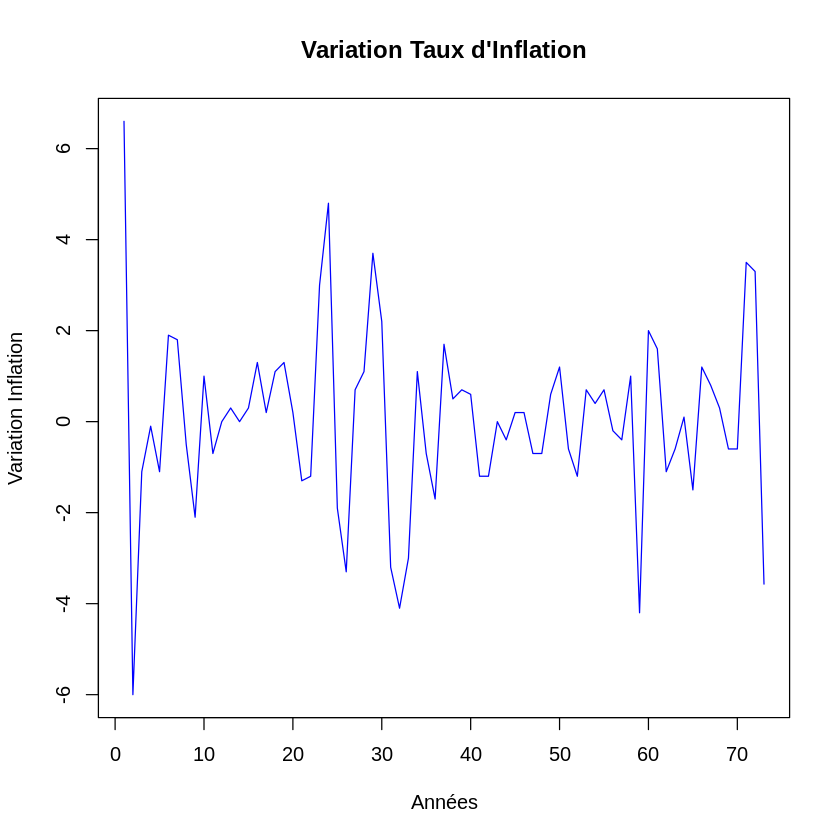

In [ ]:
# Différenciation du taux d'inflation
diff_inflation <- diff(inflation$Inflation)

# Représentation graphique du taux d'inflation différencié
plot.ts(diff_inflation, main = "Variation Taux d'Inflation", frame = T, xlab = "Années", ylab = "Variation Inflation", col = "blue")

#### **Inflation différenciée - KPSS**

##### **Test autour d'une tendance déterministe**
On teste les hypothèses suivantes d'abord :

$$\begin{equation}
\begin{cases}
H_0:Série\ stationnaire\ autour\ d'une\ tendance\ déterministe\\
H_1:Série\ non\ stationnaire\ autour\ d'une\ tendance\ déterministe
\end{cases}
\end{equation}$$

In [ ]:
# Test KPSS autour d'une tendance déterministe

kpss_inflation_diff_tau <- ur.kpss(diff_inflation, type = "tau", lags = "short")
summary(kpss_inflation_diff_tau)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 3 lags. 

Value of test-statistic is: 0.0487 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


La statistique du test $LM_{KPSS}=0,0487$. Le seuil de rejet pour un risque de première espèce est $VC=0,146$. On a donc $LM_{KPSS}=0,0487<0,146$ : on ne rejette pas $H_0$, le taux d'inflation différencié est stationnaire autour d'une tendance déterministe.

On ne peut rejeter $H_0$ pour les risques de première espèce de 1% et 10% non plus.

---

##### **Test autour d'une constante**

Ensuite, on teste les hypothèses de la stationnarité autour d'une constante :

$$\begin{equation}
\begin{cases}
H_0:Série\ stationnaire\ autour\ d'une\ constante\\
H_1:Série\ non\ stationnaire\ autour\ d'une\ constante
\end{cases}
\end{equation}$$

In [ ]:
# Test KPSS autour d'une constante

kpss_inflation_diff_mu <- ur.kpss(diff_inflation, type = "mu", lags = "short")
summary(kpss_inflation_diff_mu)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.0547 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


La statistique du test $LM_{KPSS}=0,0547$. Le seuil de rejet pour un risque de première espèce est $VC=0,463$. On a donc $LM_{KPSS}=0,0547<0,463$ : on ne rejette pas $H_0$, le taux d'inflation différencié est stationnaire autour d'une constante.

On ne peut rejeter $H_0$ pour les risques de première espèce de 1% et 10% non plus.

---

#### **Inflation différenciée - Corrélogramme simple et partiel**

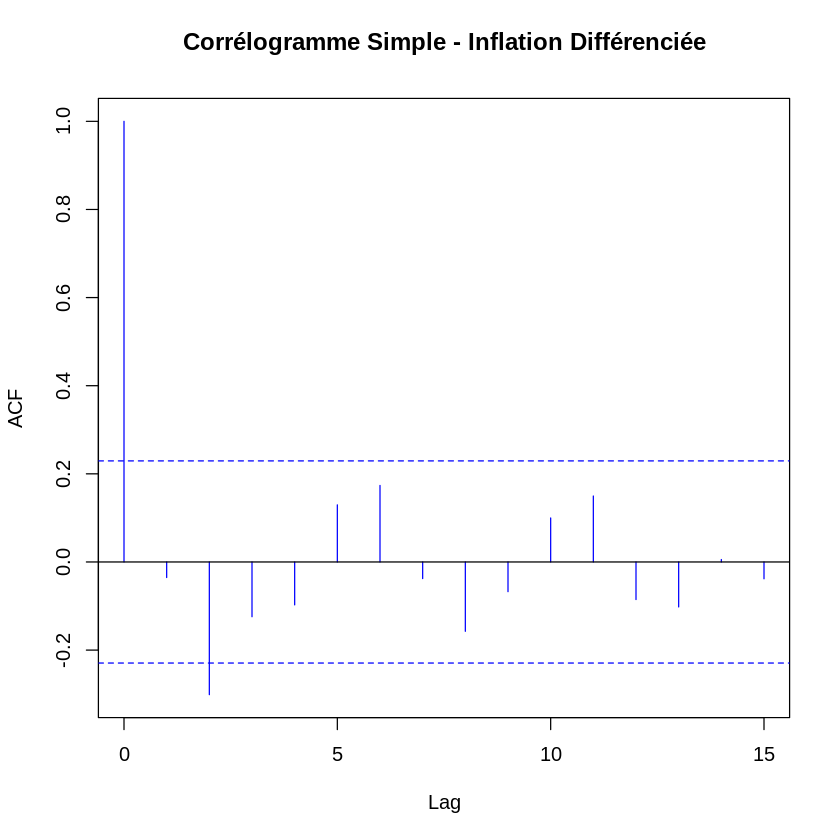

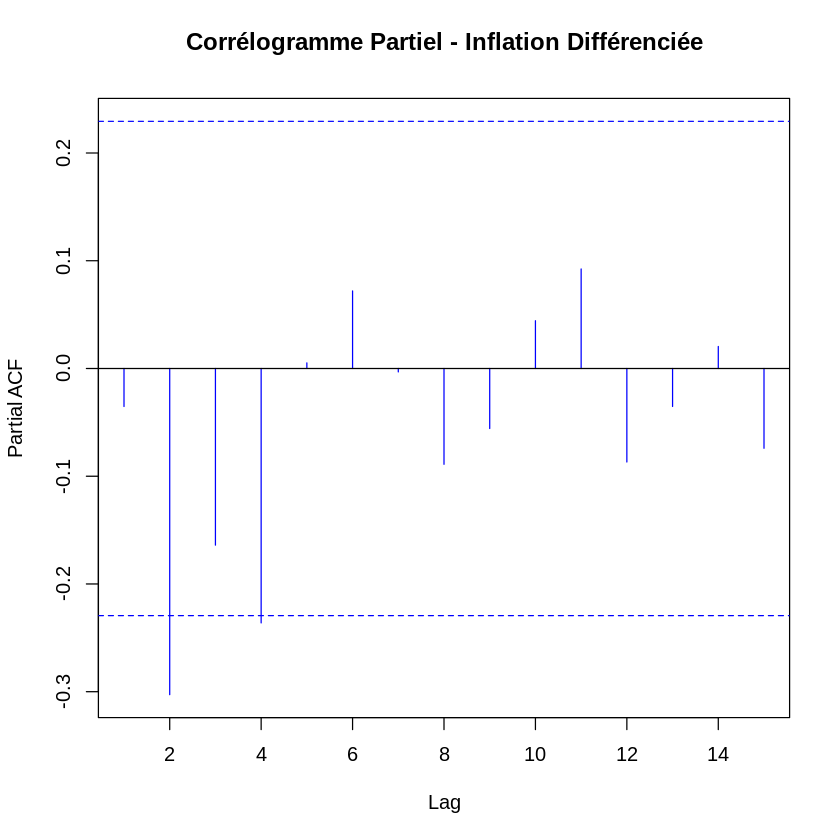

In [ ]:
acf(x = diff_inflation, lag.max = 15, main = 'Corrélogramme Simple - Inflation Différenciée', col = 'blue')

pacf(x = diff_inflation, lag.max = 15, main = 'Corrélogramme Partiel - Inflation Différenciée', col = 'blue')

L'ACF montre que les corrélations décroit assez rapidement dans la zone de non-significativité (entre les lignes bleues pointillées), ce qui est un bon signe que la différenciation a  aidé à stabiliser la variance et à rendre la série temporelle stationnaire. Seul l'autocorrélation du retard 2 est significative. Le premier retard n'est pas significatif, et proche de zéro. Cela suggére une composante $AR$

De plus, la fonction d'autocorrélation partielle décroit elle aussi avec $h$ vers 0 sous la forme d'une sinusoïde amortie, et présente une coupure à partir du 4ème retard. Cela suggère une composante $MA$. Seuls les autocorrélations partielles du retard 2 et 4 sont significatives. Le premier et le troisième retard ont approximativement pour corrélations partielles -0,4 et -0,15, respectivement.

On suppose donc que le modèle du taux d'inflation différencié est un $ARMA(2,3)$.

## **Question 4 - Estimation et Tests de Validation d'un Modèle ARMA**

Nous allons tester le modèle supposé de la série temporelle du **taux de chômage**, $AR(1)$. La série temporelle étant initialement stationnaire d'après les tests ADF et KPSS, nous pouvons l'utiliser pour l'estimation du modèle $ARMA$. Afin de vérifier la valeur du paramètre $p$, nous allons utiliser les critères d'informations, ainsi que les tests de significativité des paramètres.



### **Identification par les critères d'informations**

In [ ]:
#install.packages('forecast')
library(forecast)

mat_aic <- matrix(0,5,5)
mat_bic <- matrix(0,5,5)

for (i in 0:4){
  for (j in 0:4){
    ARMA_ij <- Arima(y = chomage$`Chômage`, order = c(i,0,j), method = "ML")
    mat_aic[i+1, j+1] <- ARMA_ij$aic
    mat_bic[i+1, j+1] <- ARMA_ij$bic
  }
}

rownames(mat_aic) <- c('p=0', 'p=1', 'p=2', 'p=3', 'p=4')
colnames(mat_aic) <- c('q=0', 'q=1', 'q=2', 'q=3', 'q=4')

rownames(mat_bic) <- c('p=0', 'p=1', 'p=2', 'p=3', 'p=4')
colnames(mat_bic) <- c('q=0', 'q=1', 'q=2', 'q=3', 'q=4')

options (digits = 5)

# Affichage matrice AIC
print(mat_aic)

#Affichage matrice BIC
print(mat_bic)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



       q=0    q=1    q=2    q=3    q=4
p=0 286.27 246.39 234.11 235.33 235.90
p=1 233.17 232.45 234.22 235.86 237.38
p=2 232.37 234.33 235.89 237.64 236.40
p=3 234.31 236.36 232.40 234.32 235.17
p=4 236.25 238.02 234.28 234.10 237.17
       q=0    q=1    q=2    q=3    q=4
p=0 290.88 253.31 243.32 246.85 249.73
p=1 240.08 241.66 245.74 249.69 253.51
p=2 241.58 245.85 249.71 253.77 254.83
p=3 245.83 250.18 248.53 252.75 255.91
p=4 250.08 254.15 252.71 254.83 260.21


On identifie un processus $AR(2)$ avec le critère
$AIC$ (232,37 < 233,17). Avec le critère $BIC$, on privilégierait un $AR(1)$ (240,08 < 241,58) mais l’$AR(2)$ est la 2ème spécification préférée. On note que la différence du critére $AIC$ entre l'$AR(1)$ et l'$AR(2)$ est de 0,8. Alors que la différence du critére $BIC$ entre l'$AR(1)$ et l'$AR(2)$ est de 1,5. De plus, on note que le critère $AIC$ a tendance à surestimer le modèle. Ainsi, pour la simplicité du modèle on a choisi le critère $BIC$, donc le modèle estimé sera un $AR(1)$, en coordination avec la supposition émise à partir des corrélogrammes simple et partiel du chômage.

### **Estimation du modèle**

On estime un processus $AR(1)$ sur le taux de chômage aux Etats-Unis de 1950 à 2023.

In [ ]:
# Estimation du processus AR(1)

AR1 <- Arima(y = chomage$`Chômage`, order = c(1,0,0))
summary(AR1)

Series: chomage$Chômage 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
        ar1   mean
      0.727  5.637
s.e.  0.079  0.461

sigma^2 = 1.28:  log likelihood = -113.58
AIC=233.17   AICc=233.51   BIC=240.08

Training set error measures:
                    ME   RMSE     MAE     MPE  MAPE   MASE    ACF1
Training set 0.0060317 1.1173 0.82168 -3.7108 14.91 0.9625 0.14765

Comme c'est l'espérance du modèle qui est reporté et non la constante, on en déduit que la constante estimée vaut :

$$\hat{c}= 5,637×(1-0,727)= 1,538901$$



#### **Test de significativité des coefficients**

Avec la librairie lmtest.

1. On vérifie la significativité de la constante :

$$\begin{equation}
\begin{cases}
H_0:c=0\\
H_1:c≠0
\end{cases}
\end{equation}$$


2. On vérifie la significativité celle des coefficients de l'$AR(2)$ :

$$\begin{equation}
\begin{cases}
H_0:𝜙_i=0\\
H_1:𝜙_i≠0
\end{cases}
\end{equation}$$

La statistique du test est:

$$t_{\hat{𝜙}_i}=\frac{\hat{𝜙}_i-0}{\hat{𝜎}_{\hat{𝜙}_i}}\underset{H_0}{\sim}St(T-K)=St(75-2)=St(73)$$



In [ ]:
library(lmtest)

# Test sur les paramètres
coeftest(AR1)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





z test of coefficients:

          Estimate Std. Error z value Pr(>|z|)    
ar1         0.7272     0.0789    9.22   <2e-16 ***
intercept   5.6372     0.4610   12.23   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


On remarque que la constante est significatif pour un risque de première espèce de 5% : $$|t_{\hat{c}_i}|=12,23>1,96$$
De même, le coefficient $𝜙$ est significatif au seuil de 5%: $$|t_{\hat{𝜙}}|=9,22>1,96$$

####**Estimation de spécifications alternatives**


On rajoute un terme $AR(2)$ puis un terme $MA(1)$ pour vérifier leurs significativité.

In [ ]:
# Ajout d'un terme AR

AR2 <- Arima(y = chomage$`Chômage`, order = c(2,0,0))
summary(AR2)
coeftest(AR2)

Series: chomage$Chômage 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
        ar1     ar2   mean
      0.869  -0.198  5.691
s.e.  0.114   0.117  0.381

sigma^2 = 1.25:  log likelihood = -112.18
AIC=232.37   AICc=232.95   BIC=241.58

Training set error measures:
                      ME   RMSE     MAE    MPE  MAPE    MASE     ACF1
Training set -0.00031555 1.0958 0.80385 -3.691 14.58 0.94162 0.013194


z test of coefficients:

          Estimate Std. Error z value Pr(>|z|)    
ar1          0.869      0.114    7.61  2.7e-14 ***
ar2         -0.198      0.117   -1.69    0.091 .  
intercept    5.691      0.381   14.92  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Le terme $AR(2)$ n’est pas significatif au seuil de 5%. La p-value est de 0,091 qui est supérieure à 0,05.

In [ ]:
# Ajout d'un terme MA

ARMA11 <- Arima(y = chomage$`Chômage`, order = c(1,0,1))
summary(ARMA11)
coeftest(ARMA11)

Series: chomage$Chômage 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
        ar1    ma1   mean
      0.613  0.251  5.677
s.e.  0.119  0.141  0.403

sigma^2 = 1.25:  log likelihood = -112.22
AIC=232.45   AICc=233.03   BIC=241.66

Training set error measures:
                    ME   RMSE     MAE     MPE   MAPE    MASE     ACF1
Training set 0.0015659 1.0964 0.80613 -3.6559 14.622 0.94428 0.016143


z test of coefficients:

          Estimate Std. Error z value Pr(>|z|)    
ar1          0.613      0.119    5.16  2.4e-07 ***
ma1          0.251      0.141    1.78    0.075 .  
intercept    5.677      0.403   14.09  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


On remarque que le terme $MA(1)$ n'est pas significatif au seuil de 5%, de plus le critère $BIC$ de ce modèle est plus élevé que celui du modèle de l'$AR(1)$.

On décide de garder le modèle de l'$AR(1)$ par la suite, puisque ni l'ajout d'un $AR$ ni d'un $MA$ n'est significatif. Ainsi, On en déduit que le modèle est de la forme :

$$X_t= 1,538901 + 0,727X_{t-1}  + 𝜀_t$$

#### **Analyse des racines**

On vérifie que les racines du polynôme $𝛷(L)$ satisfont bien les conditions de stationnarité.

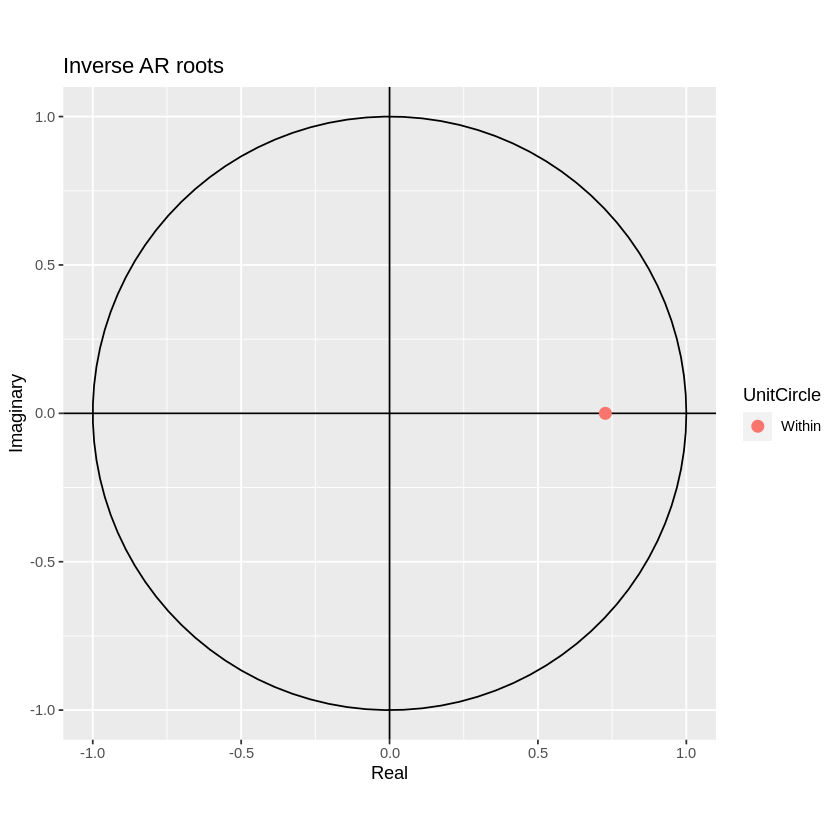

In [ ]:
autoplot(AR1)


On remarque que la racine du polynôme se situe bien à l'intérieur du disque unité complexe. Donc le processus estimé est bien stationnaire.

###**Test sur les résidus**


Les tests de vérification des résidus sont :

1. Le test d'absence d'autocorrélation de Ljung-Box
2. Le test de normalité de Jarque et Bera
3. Le test d'absence d'effet GARCH de Engle et Granger



####**Tests d'absence d'autocorrélation des résidus (Test Ljung-Box)**
On teste l'absence d'autocorrélation des résidus jusqu'à l'ordre 10. Les hypothèses du test sont :

$$\begin{equation}
\begin{cases}
H_0:𝜌(1)=𝜌(2)=...=𝜌(10)=0\ (absence\ d'autocorrélation)\\
H_1:∃i∈\{1,...,10\}\ tel\ que\  𝜌(i)≠0
\end{cases}
\end{equation}$$




	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with non-zero mean
Q* = 3.92, df = 9, p-value = 0.92

Model df: 1.   Total lags used: 10



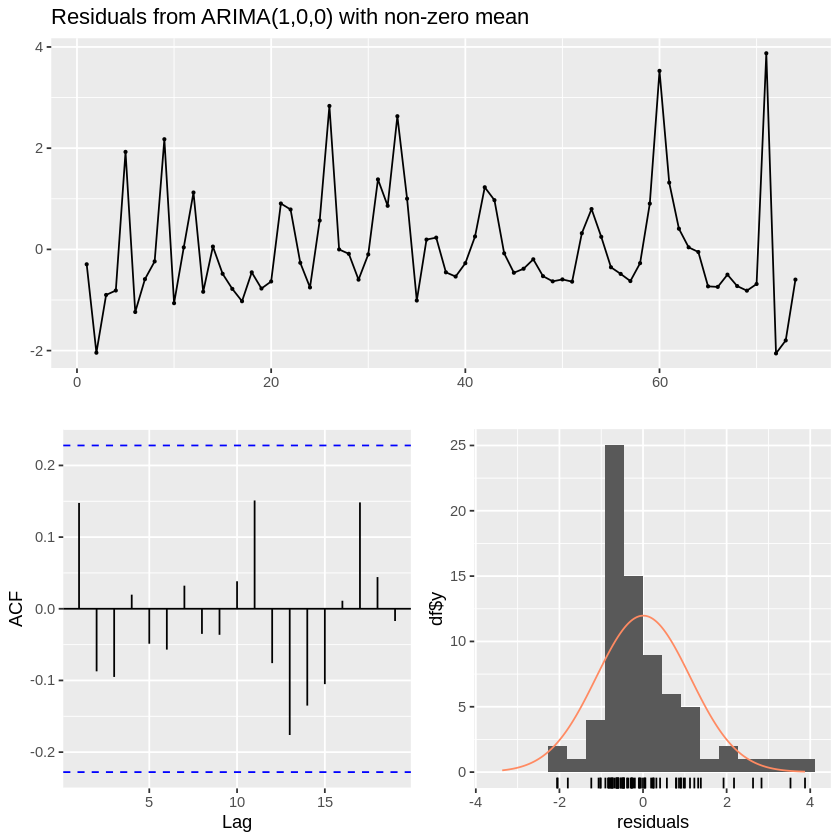

In [ ]:
# Test Ljung-Box
test_resAR1 <- checkresiduals(AR1, lag = 10)

**Commentaires**

1.   L'autocorrélogramme montre que toutes les autocorrélations sont situées dans les bornes de l'intervalle de confiance à 95% : aucune des autocorrélations n'est significativement différente de 0.

2.   La statistique de test de Ljung-Box est égale à $Q^*(10)=3,92$

*   $LB(H)\underset{H_0}{\sim}χ^2_{H-k}=χ^2_{10-1}=χ^2_{9}$
*   Les seuils critiques sont donc tirés de la loi $χ^2_{9}$ :
  * $Q^*_{0.90}(10)=14,68$ pour un risque de première espèce de 10%
  * $Q^*_{0.95}(10)=16,92$ pour un risque de première espèce de 5%
  * $Q^*_{0.99}(10)=21,666$ pour un risque de première espèce de 1%
*   $Q^*(10)=1,36$ est inférieure à ces seuils critiques. On ne rejette pas l'hypothèse nulle d'absence d'autocorrélation des résidus pour un risque de première espèce de 1%, 5%, et 10%.
*   La probabilité critique est égale à 0,92. Elle est supérieure aux risques de première espèce habituel (1%, 5% et 10%). On ne rejette pas l'hypothèse nulle d'absence d'autocorrélation des résidus.




####**Test d’absence d’effets ARCH de Engle Granger**

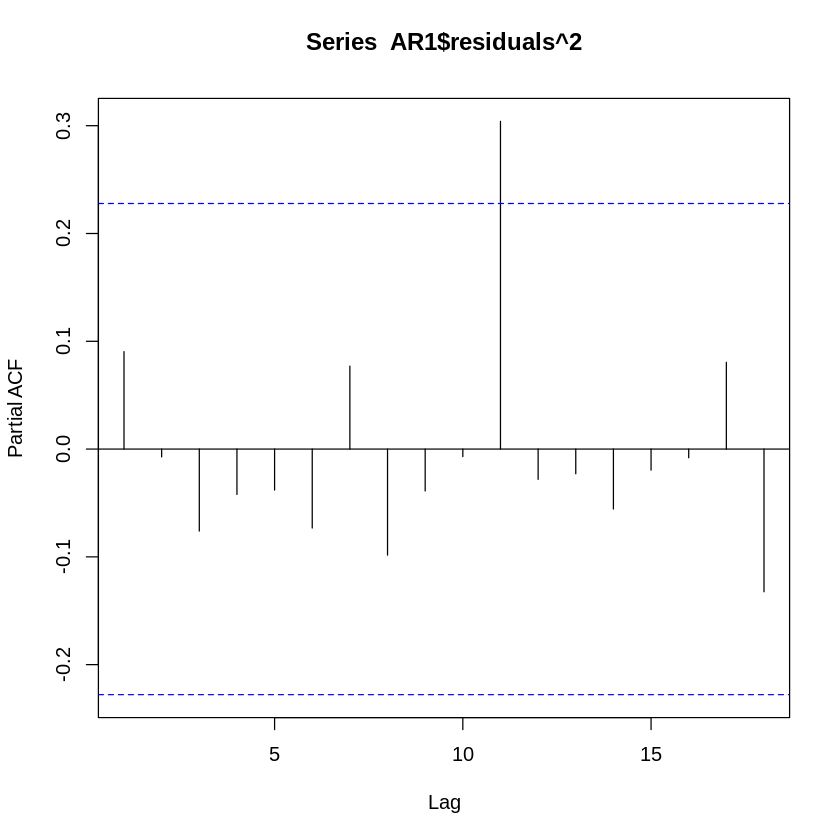

In [ ]:
pacf(AR1$residuals^2)

On remarque la présence d'un seul pic significatif. On teste l'hypothèse d'absence d'effet ARCH avec un retard. La régression estimée est :

$$\hat{𝜀}^2_t=𝛾_0+𝛾_1\hat{𝜀}^2_{t-1}+v_t$$

Les hypothèses du test sont :

$$\begin{equation}
\begin{cases}
H_0:𝛾_1=0\ (pas\ d'effet\ ARCH)\\
H_1:𝛾_1≠0\ (effet\ ARCH)
\end{cases}
\end{equation}$$

La statistique de test  est:
$$LM=T'R^2\underset{H_0}{\sim}𝜒^2_p$$

Les résultats du test d'absence d'effet ARCH figurent ci-dessous :




In [ ]:
#install.packages("FinTS")
library(FinTS)

# Test ARCH
ArchTest(AR1$residuals, lags = 1)


Attaching package: ‘FinTS’


The following object is masked from ‘package:forecast’:

    Acf





	ARCH LM-test; Null hypothesis: no ARCH effects

data:  AR1$residuals
Chi-squared = 0.599, df = 1, p-value = 0.44


*   La statistique de test est $LM_{ARCH}=0,599$
*   $LB_{stat}\underset{H_0}{\sim}χ^2_p=χ^2_1$. Les seuils critiques sont :
  * $χ^2_{1;0,90}=2,71$ pour un risque de première espèce de 10%
  * $χ^2_{1;0,95}=3,84$ pour un risque de première espèce de 5%
  * $χ^2_{1;0,99}=6,64$ pour un risque de première espèce de 1%
*   $LM_{ARCH}=0,599$ est inférieure aux seuils critiques : on ne rejette pas l'hypothèse nulle d'absence d'effet ARCH pour les résidus pour les risques de première espèce habituel (1%, 5% et 10%).
*   La p-value est égale à 44% > 5%, donc pas d'effet ARCH d'ordre 1 sur les résidus.



####**Test de normalité des résidus de Jarque Bera**

##### **Histogrammes**

On représente :
1.  l'histogramme des résidus (rectangles gris )
2.  l'histogramme d'une loi normale avec la même moyenne et le même écart-type que celui des résidus (trait rouge)



In [ ]:
# Valeur maximale des résidus
which(AR1$residuals == max(AR1$residuals))

# Valeur minimale des résidus
which(AR1$residuals == min(AR1$residuals))

[1] 71

[1] 72

A l'indice 71, les résidus atteignent leur valeur maximale, et à l'indice 72 les résidus atteignent leur valeur minimale. On enlèvera ces observations par la suite afin de ne pas influencer sur les résultats.

[1] "Skewness des residus : 1.253915"

[1] "kurtosis des residus : 4.921198"

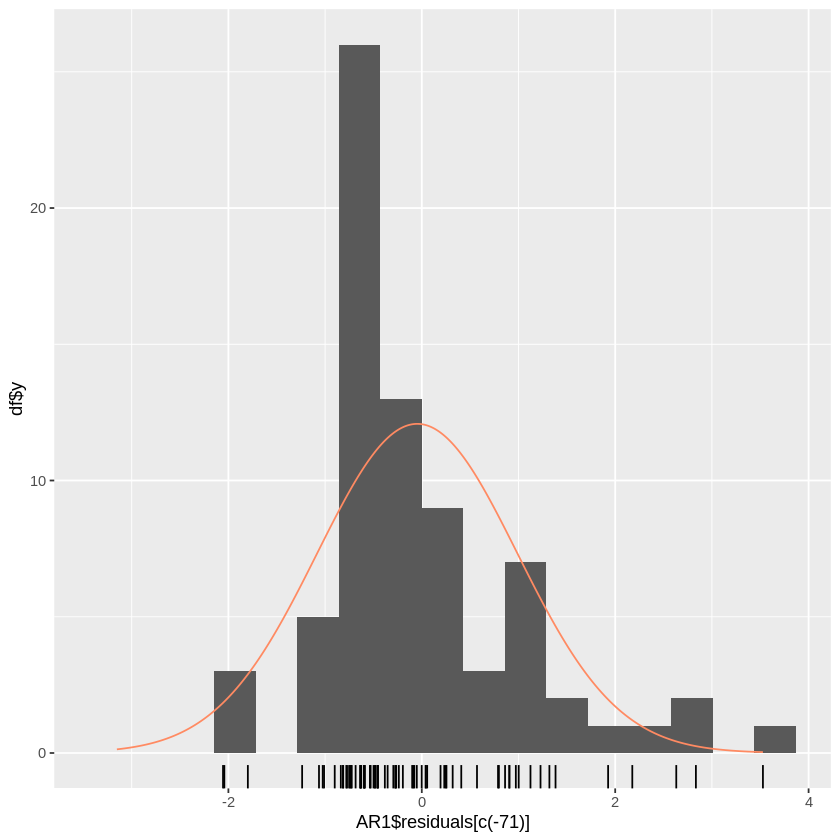

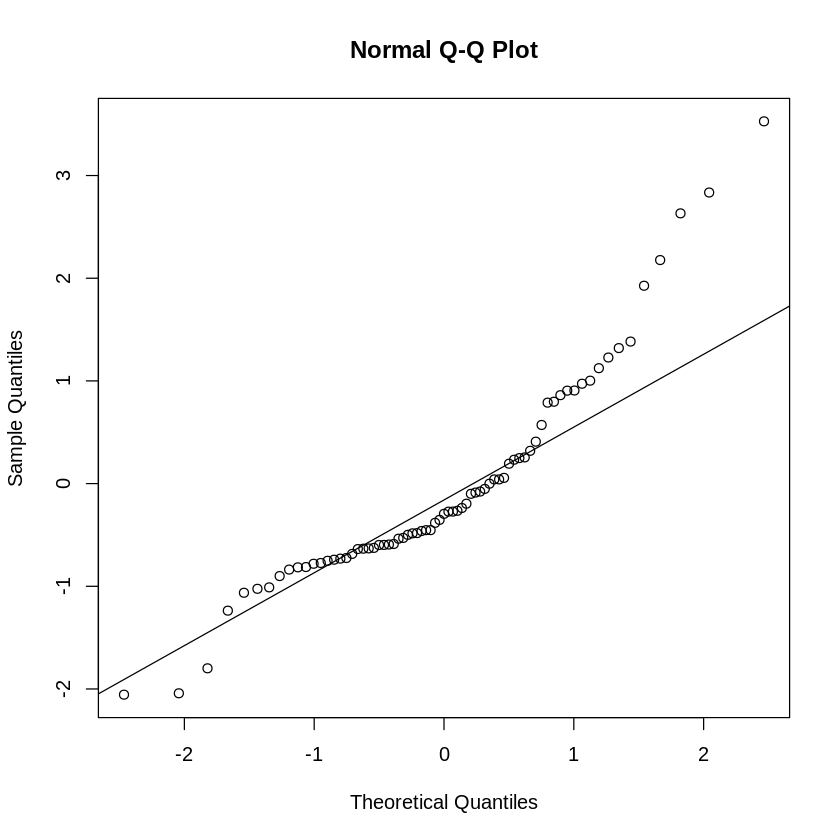

In [ ]:
#install.packages("moments")
library(moments)

# Skewness et kurtosis des résidus
sprintf("Skewness des residus : %f", skewness(AR1$residuals[c(-71,-72)]))
sprintf("kurtosis des residus : %f", kurtosis(AR1$residuals[c(-71,-72)]))

# 1er graphique (avec la 71ème obs enlevée)
gghistogram(AR1$residuals[c(-71)], add.normal = TRUE)

# 2ème graphique (avec la 71ème obs enlevée)
qqnorm(AR1$residuals[c(-71)])
qqline(AR1$residuals[c(-71)])

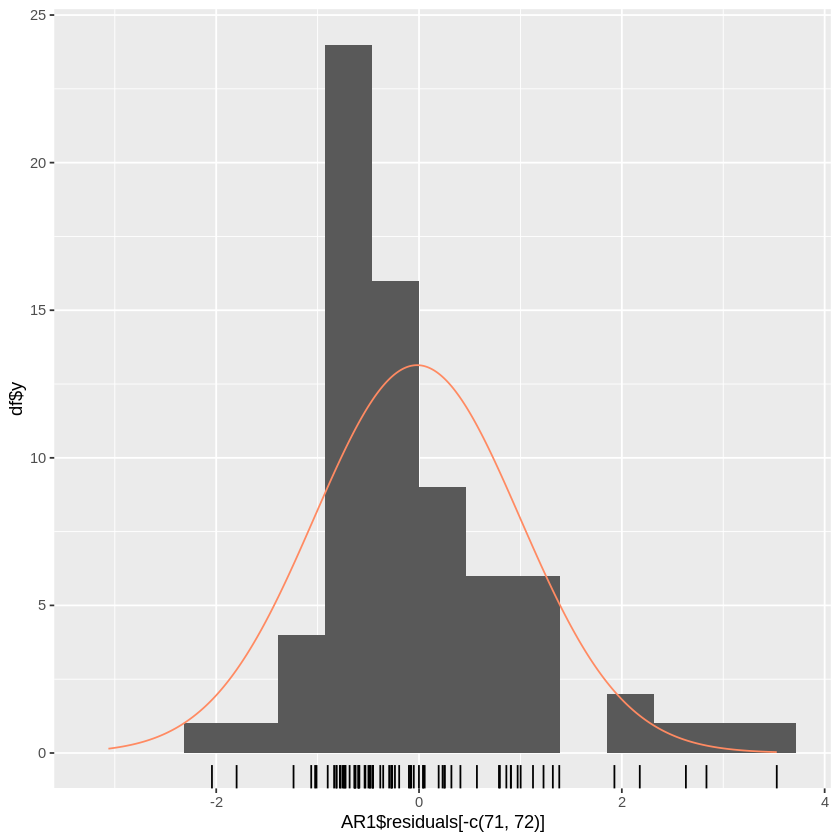

In [ ]:
# avec les 71ème et 72ème obs enlevées
gghistogram(AR1$residuals[-c(71,72)], add.normal = TRUE)

Le Skewness de 1,25 et le kurtosis de 4,92, sans la valeur maximale et minimale des résidus suggèrent que ces derniers ont une queue de distribution plus longue du côté droit (queue droite étendue), et plus lourdes que la distribution normale.

On peut voir qu'il existe des différences entre les deux histogrammes, de plus les quantiles des résidus ne suivent pas une distribution normale. Ce qui permet de supposer que les résidus ne suivent pas une loi normale.

##### **Test de normalité de Jarque Bera**

Les hypothèses du test sont :

$$\begin{equation}
\begin{cases}
H_0:S(X)=0\ et\ K(X)=3\\
H_1:S(X)≠0\ ou\ K(X)≠3
\end{cases}
\end{equation}$$

La statistique du test: $$JB=\frac{T-k}{6}\bigg[\hat{S}^2+\frac{1}{4}(\hat{K}-3)^2\bigg]\underset{H_0}{\sim}\chi^2_2$$

In [ ]:
library(tseries)

# Test de Jarque Bera
jarque.bera.test(AR1$residuals)

# Test de Jarque Bera sans les observations maximale et minimale
jarque.bera.test(AR1$residuals[-c(71,72)])


	Jarque Bera Test

data:  AR1$residuals
X-squared = 36.2, df = 2, p-value = 1.4e-08



	Jarque Bera Test

data:  AR1$residuals[-c(71, 72)]
X-squared = 29.9, df = 2, p-value = 3.2e-07


*   La statistique de test de Jarque Bera est $JB_{stat}=36,2$
*   $LB_{stat}\underset{H_0}{\sim}χ^2_2$. Les seuils critiques sont :
  * $χ^2_{2;0,90}=4,61$ pour un risque de première espèce de 10%
  * $χ^2_{2;0,95}=5,99$ pour un risque de première espèce de 5%
  * $χ^2_{2;0,99}=9,21$ pour un risque de première espèce de 1%
*   $JB_{stat}=36,2$ est supérieure aux seuils critiques de première espèce de 1%, 5% et 10% : on rejette l'hypothèse nulle, les résidus ne suivent pas une loi normale.
*   La p-value est égale à 1,4e-08 < 0,05, donc les résidus ne suivent pas une distribution normale.
*   Le rejet de l'hypothèse de normalité peut s'expliquer par les pics du taux de chômage observés en 2020 (période Covid), 1982 par exemple. La valeur du taux de chômage est alors beaucoup plus élevée que lors de période précédente. Ceci peut expliquer le kurtosis supérieur à 3.

##### **Correction de la non normalité des résidus**

Afin de corriger la normalité, nous allons créer 7 variables indicatrices, correspondant aux pics observés sur le graphique du taux de chômage.

In [ ]:
# Création d'un dataframe pour les années
annees <- df[,c("Annees")]
colnames(annees) <- c('Années')

# Création d'une dummy variable pour l'année 2008
Date <- as.Date(annees$`Années`)

DUM09 <- as.numeric(format(annees$`Années`) == "2009")
DUM10 <- as.numeric(format(annees$`Années`) == "2010")
DUM83 <- as.numeric(format(annees$`Années`) == "1982")
DUM82 <- as.numeric(format(annees$`Années`) == "1983")
DUM20 <- as.numeric(format(annees$`Années`) == "2020")
DUM75 <- as.numeric(format(annees$`Années`) == "1975")
DUM92 <- as.numeric(format(annees$`Années`) == "1951")
variables_indicatrices <- cbind(DUM82, DUM83, DUM10,DUM09, DUM20,DUM75,DUM92)

# Correction de la non normalité des résidus
AR1_DUM <- Arima(y = chomage$`Chômage`, order = c(1,0,0), xreg = variables_indicatrices)
summary(AR1_DUM)
coeftest(AR1_DUM)

Series: chomage$Chômage 
Regression with ARIMA(1,0,0) errors 

Coefficients:
        ar1  intercept  DUM82  DUM83  DUM10  DUM09  DUM20  DUM75   DUM92
      0.794      5.439  2.163  2.236  1.827  2.528  3.543  1.836  -0.868
s.e.  0.071      0.440  0.736  0.736  0.736  0.735  0.639  0.640   0.640

sigma^2 = 0.758:  log likelihood = -90.43
AIC=200.87   AICc=204.36   BIC=223.91

Training set error measures:
                    ME    RMSE     MAE     MPE   MAPE    MASE   ACF1
Training set 0.0036955 0.81581 0.66505 -2.6961 12.524 0.77903 0.2069


z test of coefficients:

          Estimate Std. Error z value Pr(>|z|)    
ar1         0.7936     0.0709   11.19  < 2e-16 ***
intercept   5.4390     0.4398   12.37  < 2e-16 ***
DUM82       2.1634     0.7361    2.94  0.00329 ** 
DUM83       2.2363     0.7361    3.04  0.00238 ** 
DUM10       1.8268     0.7361    2.48  0.01307 *  
DUM09       2.5279     0.7347    3.44  0.00058 ***
DUM20       3.5427     0.6394    5.54    3e-08 ***
DUM75       1.8364     0.6396    2.87  0.00409 ** 
DUM92      -0.8678     0.6397   -1.36  0.17490    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


On note que les coefficients $AR(1)$ et $c$ sont toujours significatifs à 5%. De plus, les critères $AIC$ et $BIC$ sont plus petits que pour la régression sans indicatrice.

In [ ]:
library(tseries)

# Test de Jarque Bera
jarque.bera.test(AR1_DUM$residuals)

# Skewness et kurtosis des résidus
#sprintf("Skewness des residus : %f", skewness(AR1_DUM$residuals[c(-71,-72)]))
#sprintf("kurtosis des residus : %f", kurtosis(AR1_DUM$residuals[c(-71,-72)]))



	Jarque Bera Test

data:  AR1_DUM$residuals
X-squared = 5.42, df = 2, p-value = 0.067


La p-value est égale à 6,7% > 5%, donc les résidus sont normalement distribués.


	Ljung-Box test

data:  Residuals from Regression with ARIMA(1,0,0) errors
Q* = 9.39, df = 9, p-value = 0.4

Model df: 1.   Total lags used: 10



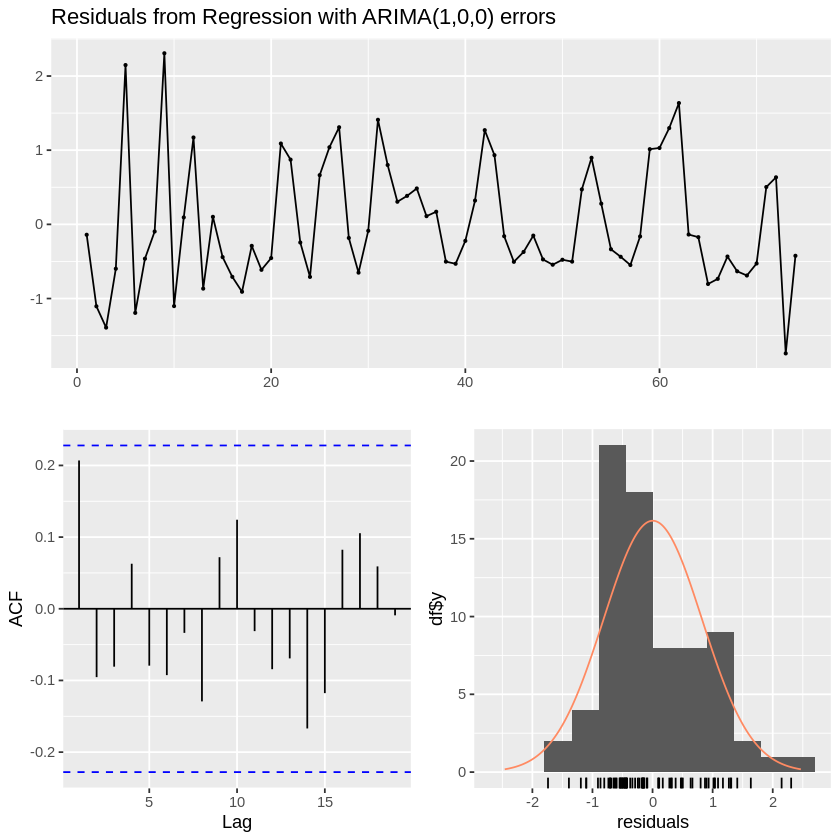


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  AR1_DUM$residuals
Chi-squared = 0.762, df = 2, p-value = 0.68


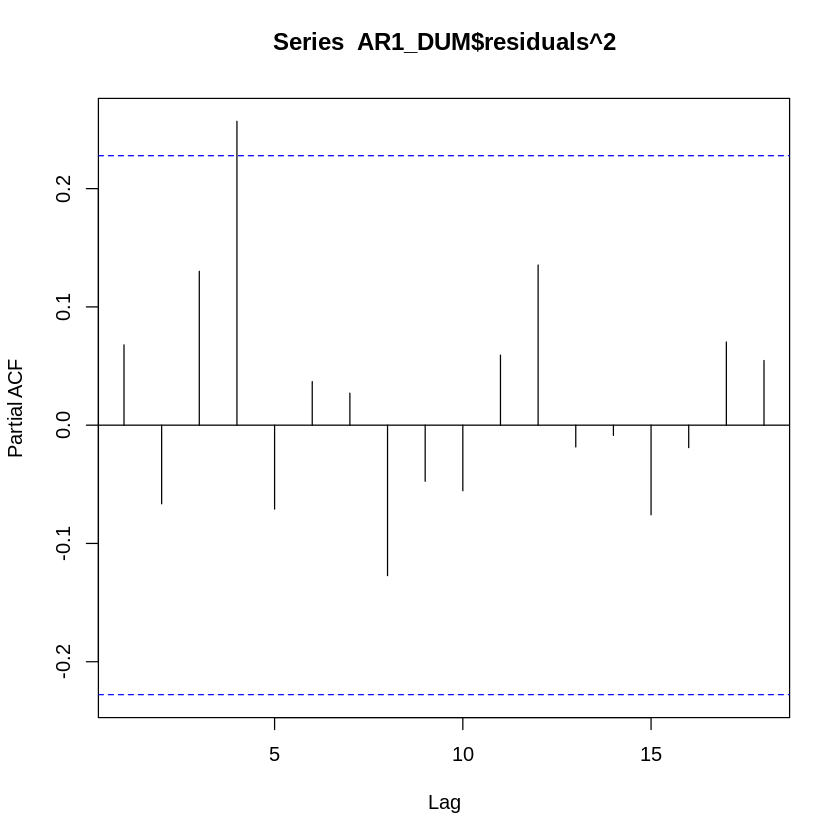

In [ ]:
library(FinTS)

# Test de Ljung-Box sur les résidus du modèle AR1_DUM
test_resAR1_DUM <- checkresiduals(AR1_DUM, lag = 10)

# Test d'absence d'effets ARCH sur les résidus du modèle AR1_DUM
pacf(AR1_DUM$residuals^2)

# Test ARCH sur les résidus du modèle AR1_DUM
ArchTest(AR1_DUM$residuals, lags = 2)

*   D'après le test de Ljung-Box, les résidus du modèle AR1_DUM ne présentent pas de corrélations puisque la p-value est égale à 40%.
*   D'après le test d'effets ARCH, les résidus du modèle AR1_DUM ne présentent pas d'effet ARCH, la p-value = 68%.



## **Question 5 - Les Prévisions**

###**Prévision avec le modèle sans indicatrice**

####**Calclul des prévisions et représentation graphique**

   Point Forecast  Lo 95  Hi 95
75         4.1476 1.9276 6.3677
76         4.5540 1.8090 7.2989
77         4.8495 1.8640 7.8349

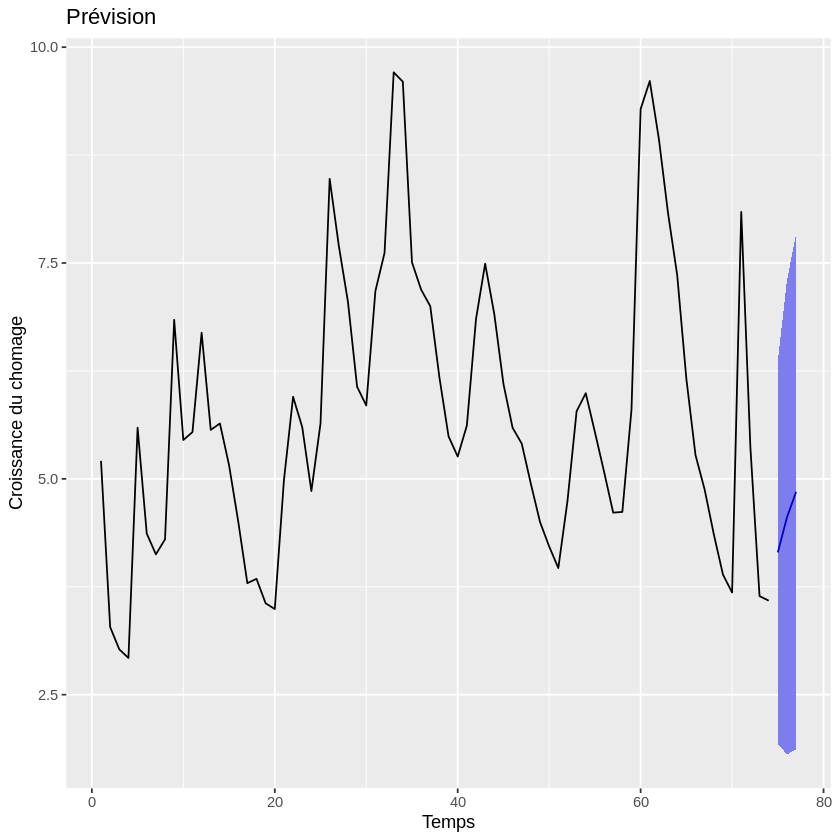

In [ ]:
forecast_AR1 <- forecast(AR1, h = 3, level = 95)
forecast_AR1

autoplot(forecast_AR1, main = 'Prévision', xlab = 'Temps', ylab = 'Croissance du chomage')

$$X_t= 1,538901 + 0,727X_{t-1}  + 𝜀_t$$


Les prévisions du taux de chômage vont dépendre uniquement de la dernière observation passée.

####**Calcul de la prévision pour 2024 (h=1)**

In [ ]:
tail(forecast_AR1$mean, n = 4)

tail(chomage[73:74,])

A Time Series:
[1] 4.1476 4.5540 4.8495

Années,Chômage
<dbl>,<dbl>
2022,3.6417
2023,3.5889


La prévision du taux de chômage pour l'année 2024 est : $X_{2024}= 1,538901 + 0,727\times3.5889 = 4,148$

####**Calcul de la prévision pour 2025 (h=2)**

La prévision du taux de chômage pour l'année 2025 est : $X_{2025}= 1,538901 + 0,727\times4,1480 = 4,554$

####**Calcul de la prévision pour 2026 (h=3)**

La prévision du taux de chômage pour l'année 2026 est : $X_{2026}= 1,538901 + 0,727\times4,554 = 4,849$


###**Prévision avec le modèle avec indicatrice**

    Point Forecast  Lo 80   Hi 80  Lo 95   Hi 95
 75         3.9708 2.8552  5.0863 2.2647  5.6768
 76         3.4060 1.9818  4.8301 1.2279  5.5840
 77         4.5143 2.9263  6.1023 2.0857  6.9430
 78         4.7052 3.0221  6.3882 2.1312  7.2792
 79         4.8566 3.1164  6.5969 2.1952  7.5181
 80         4.9769 3.2015  6.7522 2.2617  7.6920
 81         5.0722 3.2752  6.8693 2.3239  7.8206
 82         5.1480 3.3373  6.9586 2.3789  7.9170
 83         5.2080 3.3889  7.0271 2.4260  7.9901
 84         5.2557 3.4313  7.0801 2.4655  8.0459
 85         5.2936 3.4658  7.1213 2.4982  8.0889
 86         5.3236 3.4937  7.1534 2.5250  8.1221
 87         5.3474 3.5162  7.1786 2.5468  8.1480
 88         5.3663 3.5343  7.1983 2.5645  8.1682
 89         5.3813 3.5488  7.2139 2.5787  8.1840
 90         5.3932 3.5604  7.2261 2.5901  8.1964
 91         5.4027 3.5696  7.2358 2.5992  8.2062
 92         5.4102 3.5770  7.2434 2.6065  8.2139
 93         5.4161 3.5828  7.2495 2.6124  8.2199
 94         5.4209 3

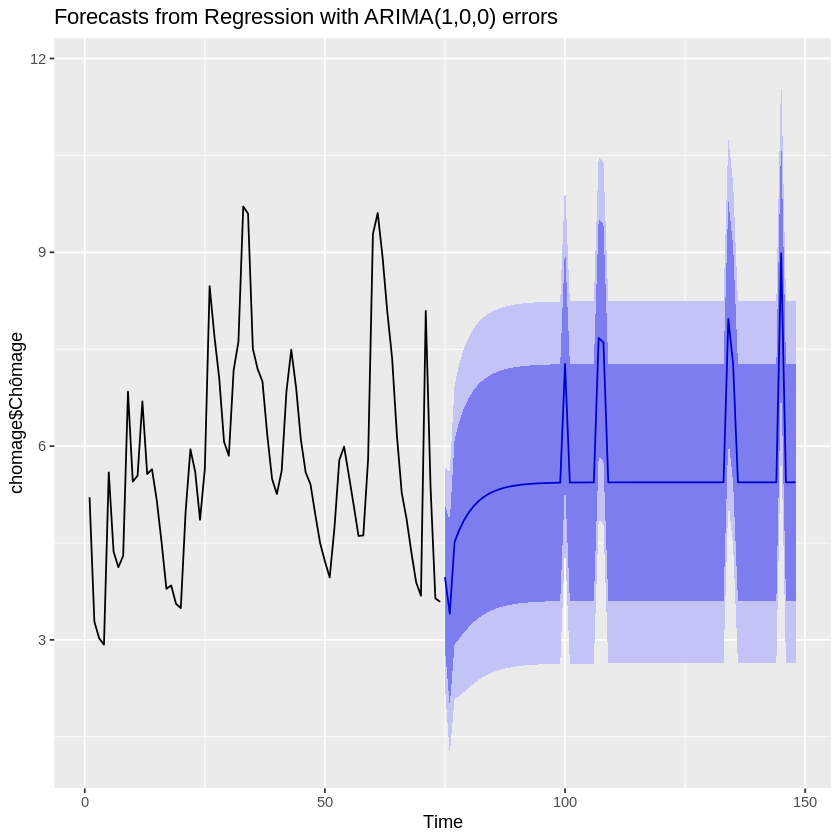

In [ ]:
library(forecast)

forecast_DUM <- forecast(AR1_DUM, h = 3, xreg = variables_indicatrices)
forecast_DUM
autoplot(forecast_DUM)

Le modèle avec indicatrice a les mêmes prévisions sur les horizons $h$ que le modèle sans indicatrice, puisque ces dernières vont toutes être égales à 0 pour les dates $t$ égale à 2024, 2025, 2026.  

# **Partie II - Modélisation Multivariée**

On utilise un modéle VAR pour étudier les relations entre le taux de chômage et le taux d'inflation différencié aux Etats-Unis.


## **Question 6 - Modélisation VAR**

On utilise la librairie "vars" pour estimer le modèle VAR.

###**Estimation d'un modèle VAR**

---



In [ ]:
# Fusion des deux séries de l'inflation différenciée et le chômage.

# On enlève la 1ère obs du taux de chômage car l'inflation manque une obs à cause de la différenciation
df_Chom <- chomage[-1,]
df_infS <- data.frame(Annees = annees[-1,], Inflation_différencié = diff_inflation)

colnames(df_infS) <- c('Années','Inflation Différenciée')

# Affichage chômage
head(df_Chom)
tail(df_Chom)

# Affichage inflation différenciée
head(df_infS)
tail(df_infS)

# Affichage dataframe fusionné
endogen <- merge(df_infS, df_Chom, by='Années')
head(endogen)
tail(endogen)

Années,Chômage
<dbl>,<dbl>
1951,3.2833
1952,3.0250
1953,2.9250
1954,5.5917
1955,4.3667
1956,4.1250


Années,Chômage
<dbl>,<dbl>
2018,3.8917
2019,3.6833
2020,8.0917
2021,5.3667
2022,3.6417
2023,3.5889


,Années,Inflation Différenciée
,<dbl>,<dbl>
1,1951,6.6
2,1952,-6.0
3,1953,-1.1
4,1954,-0.1
5,1955,-1.1
6,1956,1.9


,Années,Inflation Différenciée
,<dbl>,<dbl>
68,2018,0.30
69,2019,-0.60
70,2020,-0.60
71,2021,3.50
72,2022,3.30
73,2023,-3.57


,Années,Inflation Différenciée,Chômage
,<dbl>,<dbl>,<dbl>
1,1951,6.6,3.2833
2,1952,-6.0,3.0250
3,1953,-1.1,2.9250
4,1954,-0.1,5.5917
5,1955,-1.1,4.3667
6,1956,1.9,4.1250


,Années,Inflation Différenciée,Chômage
,<dbl>,<dbl>,<dbl>
68,2018,0.30,3.8917
69,2019,-0.60,3.6833
70,2020,-0.60,8.0917
71,2021,3.50,5.3667
72,2022,3.30,3.6417
73,2023,-3.57,3.5889


On commence par déterminer le nombre de retards par l'application de critères d'information multivariés. On doit spécifier :


1.  lag.max = nombre maximal de retards
2.   type = forme de la composante déterministe "const", "trend", "both" ou "none" (1 seule spécification possible).

On choisit un nombre de retards maximum égal à 4 (correspond à 4 années de recul) et l'on estime un modèle VAR sans constante. D'après nos résultats précédents, on a le taux de chômage stationnaire autour d'une constante, alors que le taux d'inflation différencié est un processus DS sans dérive. Afin de décider de la forme de la composante déterministe entre: "const" et "none", nous allons estimer un modèle VAR avec constante et sans constante. Ensuite décider quel modèle à garder en fonction de ces deux derniers.

#### **Modèle VAR sans constante**

In [ ]:
#install.packages('vars')
library(vars)

pselect <- VARselect(y = endogen, lag.max = 4, type = 'none')

# Affichage des valeurs des critères de sélection
pselect$criteria

# Nombre de retards optimal selon les critères de sélection
pselect$selection

Loading required package: MASS

Loading required package: strucchange

Loading required package: sandwich



,1,2,3,4
AIC(n),-7.87400628,-5.4471e+01,-5.4557e+01,-5.4534e+01
HQ(n),-7.75839611,-5.4240e+01,-5.4210e+01,-5.4072e+01
SC(n),-7.58260109,-5.3888e+01,-5.3683e+01,-5.3369e+01
FPE(n),0.00038057,2.2090e-24,2.0330e-24,2.0931e-24


AIC(n)  HQ(n)  SC(n) FPE(n) 
     3      2      2      3

Le nombre de retard optimal varie selon le critère :

- Le critère $AIC$ préconise 3 retards,
- Le critère $HQ$ préconise 2 retards,
- Le critère $SC$ préconise 2 retard,
- Le nombre de retards optimaux sont néanmoins inférieurs à lag.max

Le critère $AIC$ est connu pour surestimer le nombre de retards. On décide d'estimer le modèle $VAR$ avec 2 retards.

In [ ]:
#install.packages('vars')
library(vars)

# Estimation du VAR
VAR2 <- VAR(y = endogen[,c('Inflation Différenciée','Chômage')], type = "none", lag.max = 2)
summary(VAR2)


VAR Estimation Results:
Endogenous variables: Inflation.Différenciée, Chômage 
Deterministic variables: none 
Sample size: 71 
Log Likelihood: -240.114 
Roots of the characteristic polynomial:
0.983 0.582 0.582 0.0073
Call:
VAR(y = endogen[, c("Inflation Différenciée", "Chômage")], 
    type = "none", lag.max = 2)


Estimation results for equation Inflation.Différenciée: 
Inflation.Différenciée = Inflation.Différenciée.l1 + Chômage.l1 + Inflation.Différenciée.l2 + Chômage.l2 

                          Estimate Std. Error t value Pr(>|t|)   
Inflation.Différenciée.l1   0.0814     0.1106    0.74   0.4639   
Chômage.l1                 -0.2309     0.1704   -1.36   0.1799   
Inflation.Différenciée.l2  -0.3061     0.1000   -3.06   0.0032 **
Chômage.l2                  0.2322     0.1702    1.36   0.1771   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 1.61 on 67 degrees of freedom
Multiple R-Squared: 0.176,	Adjusted R-squared: 0.127 
F-statist

- Résultats de l'équation pour **le taux d'inflation différencié** :
 * Le lag 2 du taux d'inflation différencié est significatif (p-value = 0.0032) au seuil de 1%.

 * Les autres coefficients (lag 1 du taux d'inflation différencié, lag 1 et 2 du taux de chômage) sont statistiquement significatifs au seuil de 5%.
 * Les coefficients (lag 1 du taux de chômage et lag 2 du taux d'inflation différencié) sont négatifs.
 * Le $R^2$ ajusté est 12,7% ce qui indique une capacité modeste du modèle à expliquer la variabilité du taux d'inflation différencié.

- Résultats de l'équation pour **le taux de chômage** :
 * Le lag 1 du taux de chômage est très significatif (p-value = 7,1e-12 < 0,01).
 * Les deux lags du taux d'inflation différencié sont significatifs au seuil de 5%. Cependant, le lag 2 du taux de chômage n'est pas significatif.
 * Le $R^2$ ajusté est très élevé (0.963), suggérant que le modèle explique presque toute la variabilité du taux de chômage.



#### **Modèle VAR avec constante**

In [ ]:
#install.packages('vars')
library(vars)

pselect <- VARselect(y = endogen, lag.max = 4, type = 'const')

# Affichage des valeurs des critères de sélection
pselect$criteria

# Nombre de retards optimal selon les critères de sélection
pselect$selection

,1,2,3,4
AIC(n),-5.4578e+01,-5.4384e+01,-5.4470e+01,-5.4447e+01
HQ(n),-5.4424e+01,-5.4114e+01,-5.4085e+01,-5.3946e+01
SC(n),-5.4190e+01,-5.3704e+01,-5.3499e+01,-5.3184e+01
FPE(n),1.9819e-24,2.4116e-24,2.2214e-24,2.2900e-24


AIC(n)  HQ(n)  SC(n) FPE(n) 
     1      1      1      1

Tous les critéres renvoient 1 retard. Nous estimons donc le modéle VAR(1)

In [ ]:
#install.packages('vars')
library(vars)

# Estimation du VAR
VAR1 <- VAR(y = endogen[,c('Inflation Différenciée','Chômage')], type = "const", lag.max = 1)
summary(VAR1)


VAR Estimation Results:
Endogenous variables: Inflation.Différenciée, Chômage 
Deterministic variables: const 
Sample size: 72 
Log Likelihood: -251.927 
Roots of the characteristic polynomial:
0.735 0.0483
Call:
VAR(y = endogen[, c("Inflation Différenciée", "Chômage")], 
    type = "const", lag.max = 1)


Estimation results for equation Inflation.Différenciée: 
Inflation.Différenciée = Inflation.Différenciée.l1 + Chômage.l1 + const 

                          Estimate Std. Error t value Pr(>|t|)
Inflation.Différenciée.l1  -0.0493     0.1201   -0.41     0.68
Chômage.l1                 -0.0493     0.1447   -0.34     0.73
const                       0.2408     0.8667    0.28     0.78


Residual standard error: 1.89 on 69 degrees of freedom
Multiple R-Squared: 0.00312,	Adjusted R-squared: -0.0258 
F-statistic: 0.108 on 2 and 69 DF,  p-value: 0.898 


Estimation results for equation Chômage: 
Chômage = Inflation.Différenciée.l1 + Chômage.l1 + const 

                          Estimate Std

- Résultats de l'équation pour **le taux d'inflation différencié** :
 * Les lags 1 du taux d'inflation différencié et du taux de chômage ne sont pas statistiquement significatifs, avec des valeurs p-value élevées (0.68 et 0.73 respectivement).
 * Le terme constant n'est pas significatif non plus (p-value = 0.78).
 * Le $R^2$ ajusté est négatif -2,58%, ce qui indique que le modèle est inadéquat et qu'il ne parvient pas à expliquer la variance du taux d'inflation différencié.

- Résultats de l'équation pour **le taux de chômage** :
 * Le lag 1 du taux de chômage est très significatif (p-value < 0.001), indiquant un fort effet du chômage passé sur le chômage actuel.
 * Le lag 1 du taux d'inflation différencié n'est pas significatif.
 * Le terme constant est significatif (p-value = 0.0045).
 * Le $R^2$ ajusté est assez élevé (52,4%), indiquant que le modèle explique une bonne part de la variabilité du taux de chômage.

- Conclusion:

On décide de garder le modèle VAR sans constante, c'est à dire VAR(2). En effet, dans ce modèle, les coefficients des variables explicatives (inflation différencié lag 1 et 2, et chomage lag 1 et 2) de l'équation de l'inflation différencié sont tous significatifs. De plus, le $R^2$ ajusté de l'estimation  du taux de chômage dans ce modèle est relativement élevé (96,3%).

In [ ]:
# Matrice des coefficients du modèle VAR(2)

A <- Acoef(VAR2)
A

,Inflation.Différenciée.l1,Chômage.l1
Inflation.Différenciée,0.08145,-0.23094
Chômage,0.11951,1.04884
,Inflation.Différenciée.l2,Chômage.l2
Inflation.Différenciée,-0.306114,0.232244
Chômage,0.076244,-0.065785


####**Affichage des racines du polynôme caractéristique**

On étudie la stationnarité du $VAR(2)$. La fonction roots renvoie les modules des inverses des racines du polynôme caractéristique.



In [ ]:
# Roots du modèle VAR(2)
roots(VAR2)

[1] 0.982778 0.582177 0.582177 0.007297

Les inverses des racines de module sont strictement inférieurs à 1 : la condition de stationnarité est donc satisfaite.



## **Question 7 - Les Tests de Causalité au Sens de Granger**

####**Causalité de l'inflation différenciée sur le chômage**


L'équation du chomage s'écrit :

$$C_t=a_{21}^1\times{ID}_{t-1}+a_{22}^1\times{C}_{t-1}+a_{21}^2\times{ID}_{t-2}+a_{22}^2\times{C}_{t-2}$$

Les résultats du test figurent ci-dessous :

On vérifie la significativité du coefficient de **Inflation.Différenciée** dans l'équation de **Chômage**.

* Les hypothèses du test sont :

$$\begin{equation}
\begin{cases}
H_0:a_{21}^1=a_{21}^2=0\ (Inflation.Différenciée\ ne\ cause\ pas\  Chômage)\\
H_1: \overline{H_0}\ (Inflation.Différenciée\ cause\ Chômage)
\end{cases}
\end{equation}$$

où $a_{21}$ est le coefficient de la ligne 2 et colonne 1 des matrices $A$.

* La statistique du test :

$$F=\frac{(SCR_0-SCR_1)/p}{SCR_1/(T'-2p-1)}\underset{H_0}{\sim}F_{p,\ T'-2p-1}$$

* La règle de décision : rejet de $H_0$ au seuil $𝛼$ si $F>F_{p,\ T'-2p-1}^{1-𝛼}$ ou $p-value<𝛼$

In [ ]:
# Test de causalité de l'inflation différenciée sur le chômage

TC1 <- causality(VAR2, cause = c('Inflation.Différenciée'))
TC1$Granger


	Granger causality H0: Inflation.Différenciée do not Granger-cause
	Chômage

data:  VAR object VAR2
F-Test = 1.67, df1 = 2, df2 = 134, p-value = 0.19


La p-value du test vaut 19% > 5%, donc on ne rejette pas l'hypothèse nulle d'absence de causalité de l'inflation différenciée sur la chômage. C'est à dire que l'inflation différenciée ne cause pas le chômage pour un risque de première espéce de 5%.

####**Causalité du chômage sur l'inflation différenciée**

L'équation de l'inflation différenciée s'écrit :

$$ID_t=a_{11}^1\times{ID}_{t-1}+a_{12}^1\times{C}_{t-1}+a_{11}^2\times{ID}_{t-2}+a_{12}^2\times{C}_{t-2}$$

Les résultats du test figurent ci-dessous :


On vérifie la significativité du coefficient de **Chômage** dans l'équation de **Inflation.Différenciée**.

* Les hypothèses du test sont :

$$\begin{equation}
\begin{cases}
H_0:a_{12}^1= a_{12}^2=0\ (Chômage\ ne\ cause\ pas\ Inflation.Différenciée)\\
H_1:\overline{H_0}\ (Chômage\ cause\ Inflation.Différenciée)
\end{cases}
\end{equation}$$

où $a_{12}^{1}$ est le coefficient de la ligne 1 et colonne 2 de la matrice $A$.

* La statistique du test :

$$F=\frac{(SCR_0-SCR_1)/p}{SCR_1/(T'-2p-1)}\underset{H_0}{\sim}F_{p,\ T'-2p-1}$$

* La règle de décision : rejet de $H_0$ au seuil $𝛼$ si $F>F_{p,\ T'-2p-1}^{1-𝛼}$ ou $p-value<𝛼$

In [ ]:
# Test de causalité du chômage sur l'inflation différenciée
TC2 <- causality(VAR2, cause = c("Chômage"))
TC2$Granger


	Granger causality H0: Chômage do not Granger-cause
	Inflation.Différenciée

data:  VAR object VAR2
F-Test = 0.934, df1 = 2, df2 = 134, p-value = 0.4


La p-value du test vaut 40% > 5%, donc on ne rejette pas l'hypothése nulle d'absence de causalité du chomage sur l'inflation. C'est à dire que le chomage ne cause pas l'inflation différenciée pour un risque de première espéce de 5%.

## **Question 8 - Analyse Impulsion-Réponse des Chocs**

#### **Décomposition de la variance**

On décide de réaliser la décomposition de la variance afin de savoir quelle variable prendre en premier dans la décomposition de Choleski.

$Inflation.Différenciée
      Inflation.Différenciée  Chômage
 [1,]                1.00000 0.000000
 [2,]                0.97489 0.025115
 [3,]                0.97678 0.023219
 [4,]                0.97433 0.025667
 [5,]                0.97425 0.025746
 [6,]                0.97416 0.025840
 [7,]                0.97416 0.025841
 [8,]                0.97412 0.025875
 [9,]                0.97410 0.025903
[10,]                0.97410 0.025905
[11,]                0.97409 0.025907
[12,]                0.97409 0.025913
[13,]                0.97408 0.025921
[14,]                0.97407 0.025926
[15,]                0.97407 0.025931
[16,]                0.97406 0.025936
[17,]                0.97406 0.025941
[18,]                0.97405 0.025945
[19,]                0.97405 0.025950
[20,]                0.97405 0.025954

$Chômage
      Inflation.Différenciée Chômage
 [1,]               0.106702 0.89330
 [2,]               0.069297 0.93070
 [3,]               0.048454 0.95155
 [4,]               

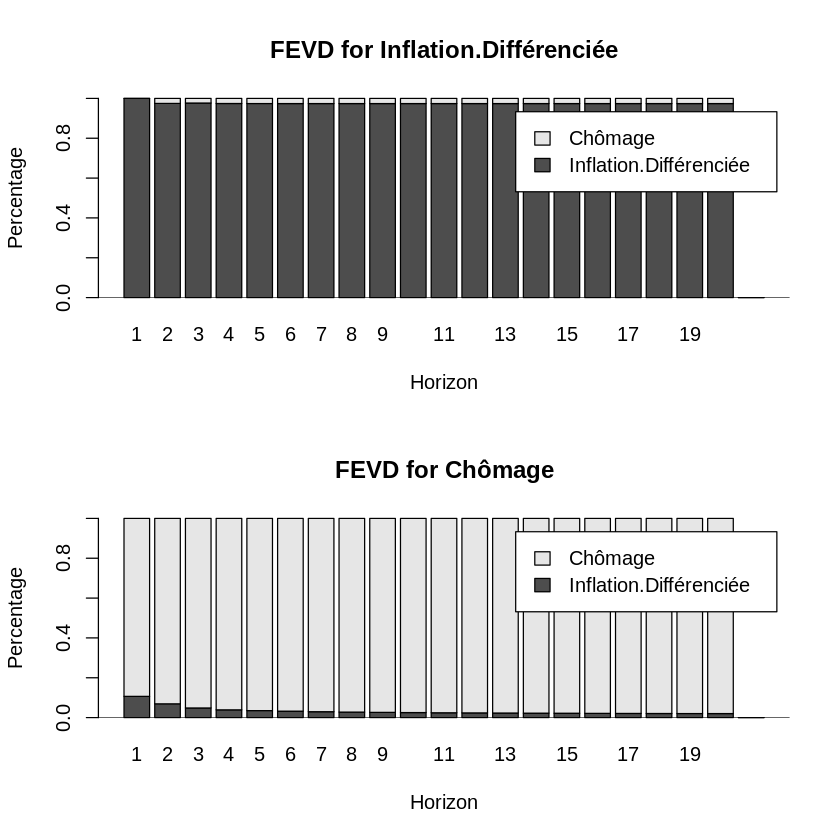

In [ ]:
dec_var <- fevd(VAR2, n.ahead = 20)
print(dec_var)
plot(dec_var)

Les graphiques semblent illustrer que la majorité de la variance de l'inflation différenciée est expliquée par ses propres chocs plutôt que par ceux du chômage à travers différents horizons temporels. De même, pour la série du chômage, la variance est principalement expliquée par ses propres chocs et non aux chocs de l'inflation différenciée.


####**Méthode VAR**

On calcule les fonctions impulsion réponse :

* n.ahead : nombre de périodes futures pour lesquelles on calcule les impulsion réponse

* ortho = TRUE : on applique la décomposition de Cholesky

* ci = 0.95 : on représente les bornes de l'intervalle de confiance à 95 % pour déterminer la significativité des IRF.

On décide de prendre l'inflation différenciée en premier dans la décomposition de Choleski, car c'est l'inflation différenciée qui est la moins causée puisque le F - test correspondant est égale à 93,4%.

##### **Inflation différenciée**


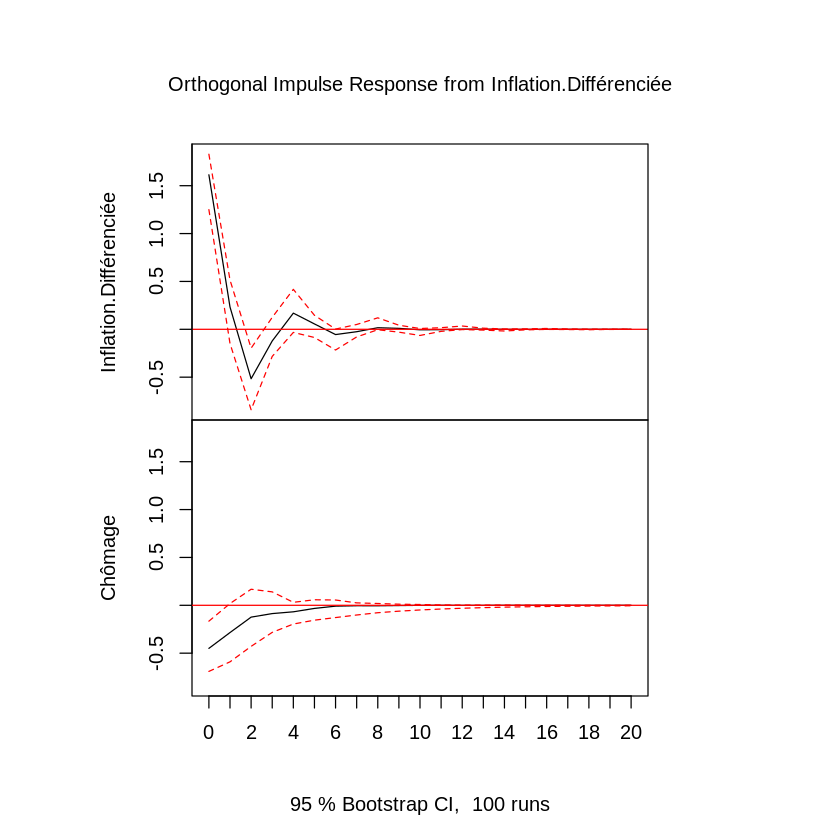

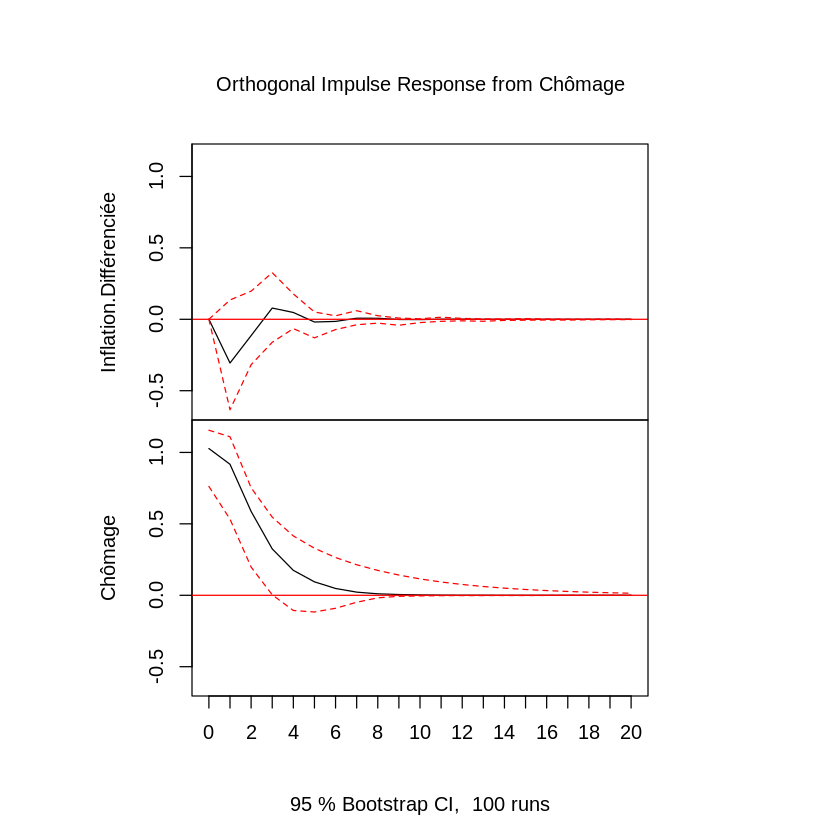

In [ ]:
# Inflation différenciée en 1er
var.2lag <- VAR(y = endogen[,c("Inflation Différenciée","Chômage")], type = "const", lag.max = 2)

irf <- irf(var.2lag, n.ahead = 20, ortho = TRUE, ci = 0.95)
plot(irf)

* La première figure **"Orthogonal IR from Inflation_Différenciée"** retrace les réponses de l'inflation diférenciée (premier graphe) et du chômage (second graphe) à un **choc sur l'inflation différenciée**.

Les réponses à un choc dans l'inflation différenciée sont affichées. On peut observer que le choc sur l'inflation différenciée a un impact initial sur elle-même qui s'estompe rapidement, suggérant que l'inflation revient rapidement à son niveau d'équilibre après un choc. La réponse du chômage à un choc d'inflation semble être minimale et rentre également dans la bande de confiance après quelques périodes, ce qui indique que le choc de l'inflation n'a pas un effet durable ou significatif sur le chômage.

* La seconde figure **"Orthogonal IR from Chômage"** retrace les réponses de l'inflation diférenciée (premier graphe) et du chômage (second graphe) à un **choc sur le chômage**.

Ici, un choc dans le chômage semble avoir un effet négatif initial sur l'inflation différenciée qui devient insignifiant rapidement. La réponse du chômage à son propre choc montre une décroissance plus lente, indiquant que les effets d'un choc dans le chômage sur lui-même peuvent être plus persistants.

####**Méthode des projections locales de Jorda**

[[1]]
NULL


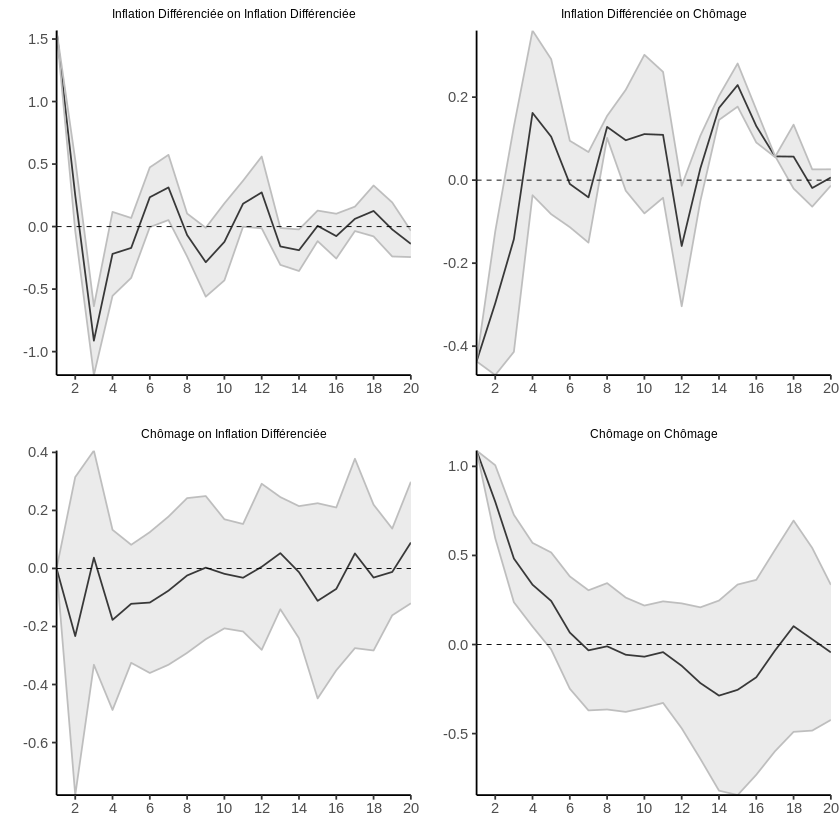

In [ ]:
#install.packages('lpirfs')
library(lpirfs)

irf_LP <- lp_lin(endog_data = endogen[,c('Inflation Différenciée','Chômage')],
                    lags_endog_lin = NaN,
                    lags_criterion = 'BIC',
                    max_lags = 4,
                    trend = 0,
                    shock_type = 0,
                    confint = 1.96,
                    hor = 20,
                    adjust_se = TRUE)

plot(irf_LP)

- Inflation différenciée sur elle-même : Les chocs dans l'inflation différenciée ont un effet initial important sur elle-même qui décroît rapidement, indiquant que l'inflation revient vers son niveau d'équilibre après un choc.

- Inflation différenciée sur le chômage : Il semble que les chocs dans l'inflation différenciée aient un effet très limité et non significatif sur le chômage, car l'intervalle de confiance inclut zéro sur presque tous les horizons.

- Chômage sur l'inflation différenciée : De même, les chocs dans le chômage ne semblent pas avoir d'impact significatif sur l'inflation différenciée, indiqué par l'intervalle de confiance qui inclut zéro.

- Chômage sur lui-même : Les chocs dans le chômage ont un impact initial assez fort sur lui-même, mais cette influence diminue avec le temps.

On conclut que les chocs internes à chaque série ont un effet plus prononcé et immédiat sur la série elle-même, tandis que l'impact d'une série sur l'autre est moins clair et généralement non significatif dans l'intervalle de confiance de 95%.


## **Question 9 - Test de Conintégration de Johansen**

Puisque, le taux de chomage est un processus stationnaire et le taux d'inflation est un processus DS(1) sans dérive comme vu à la question 3. Nous n'avons pas besoin de réaliser une cointégration de johansen.

#**Conclusion**

En conclusion les résultats obtenus offrent un nouvel éclairage sur la relation de Phillips, postulant une relation inverse entre l'inflation et le chômage. Notre analyse des séries temporelles sur une longue période a mis en évidence que les interactions entre le chômage et l'inflation aux États-Unis de 1950 à 2023 sont plus complexes et moins prédictibles que la relation traditionnelle de Phillips pourrait le suggérer.

Les fonctions de réponse impulsionnelle ont indiqué que les chocs au sein de chaque série avaient des effets principalement internes et ne traduisaient pas de relation significative croisée, ce qui remet en question la robustesse de la courbe de Phillips dans le contexte actuel. De plus, la décomposition de la variance d'erreur de prévision a montré que chaque variable est largement influencée par ses propres innovations plutôt que par celles de l'autre série. En effet, ce projet a souligné l'autonomie relative du chômage et de l'inflation en tant que processus économiques, suggérant que des facteurs autres que ceux traditionnellement envisagés pourraient jouer un rôle dans leur comportement à travers le temps.

Cela suggère que la politique économique devrait être attentive à une gamme plus diversifiée de facteurs économiques et ne pas se reposer uniquement sur le rapport traditionnel entre inflation et chômage. Considérer une gamme plus large des facteurs lorsque l'on tente de stimuler l'emploi ou de contrôler l'inflation.





